In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import statsmodels.api as sm
import math 

In [394]:
adm = pd.read_excel("adm2018.xlsx")

In [395]:
# lleno valores de NaN de adm_ftermino, debido a que ellos actualmente (mes de Junio) estan como administradores
adm["adm_ftermino"].fillna("2019-01-01 y sigue", inplace=True)

# hago copia del dataset original 
adm1= adm

# agrego columna fecha al dataset
adm1["fecha"]= adm1['adm_ftermino'].apply( lambda x: x.split()[0])

# agrego columna fechade nombramiento al dataset
adm1["fechanomb"]= adm1['adm_fnombramiento'].apply( lambda x: x.split()[0])

# elimino filas en las el nombre del administrador tiene valor NaN
adm1 = adm1.dropna(subset=['administrador'])

# convierto variable fecha en datetime
adm1['fecha'] = pd.to_datetime(adm1['fecha'])
adm1['fechanomb'] = pd.to_datetime(adm1['fechanomb'])


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [396]:
adm1

anio  expediente      ingresos      activos  patrimonio  \
0       2018           1  1.423109e+05   1337788.57  1295310.23   
1       2018       10000  3.911839e+07  27482362.90  7449106.56   
2       2018      100009  1.275258e+06    488437.09   147892.77   
3       2018      100010  2.074214e+05   1143468.72   133697.10   
4       2018      100022  5.595985e+05    292423.91   179964.99   
5       2018      100024  6.935758e+04    438039.44   274276.37   
6       2018      100026  2.177193e+05    129465.45    79848.79   
7       2018       10003  4.465600e+05   1160313.12  1080172.33   
8       2018      100030  8.473034e+06   7128934.14  1506466.01   
9       2018      100031  8.159058e+04     31360.80    14501.25   
10      2018      100037  2.109000e+04     11098.06     9098.11   
11      2018      100041  0.000000e+00      1640.30     1640.30   
12      2018      100062  0.000000e+00      7770.30     5820.00   
13      2018      100082  6.687714e+05    145394.01    65766.82   
14      2018      100085  0.000000e+00      1600.00     1600.00   
15      2018      100087  4.020621e+05    413894.64   109042.14   
16      2018      100094  3.826606e+05    333117.49   224773.75   
17      2018      100096  0.000000e+00     87978.91    56522.32   
18      2018      100103  1.107247e+06    714156.30   448765.21   
19      2018      100111  7.953529e+05    452802.24   367734.03   
20      2018      100119  0.000000e+00       800.00      800.00   
21      2018      100121  1.607800e+08  38935626.80  5591170.00   
22      2018      100123  0.000000e+00       800.00      800.00   
23      2018      100124  6.820136e+05    419474.75    80304.56   
24      2018      100128  2.896185e+05    147864.78    50017.01   
25      2018      100129  1.090564e+05     73438.85    13165.15   
26      2018      100131  0.000000e+00       800.00      800.00   
27      2018      100134  9.726130e+05    296342.49   170277.45   
28      2018      100138  6.401959e+05   3990715.57  3281337.54   
29      2018      100142  1.070000e+05     43461.84    43461.84   
...      ...         ...           ...          ...         ...   
390582  2018       99956  8.106625e+06   5390832.35  2365715.01   
390583  2018       99956  8.106625e+06   5390832.35  2365715.01   
390584  2018       99966  4.600000e+02     21369.85    20932.58   
390585  2018       99966  4.600000e+02     21369.85    20932.58   
390586  2018       99966  4.600000e+02     21369.85    20932.58   
390587  2018       99966  4.600000e+02     21369.85    20932.58   
390588  2018       99973  0.000000e+00     10101.67      800.00   
390589  2018       99973  0.000000e+00     10101.67      800.00   
390590  2018       99973  0.000000e+00     10101.67      800.00   
390591  2018       99973  0.000000e+00     10101.67      800.00   
390592  2018       99973  0.000000e+00     10101.67      800.00   
390593  2018       99983  6.881723e+05    439518.55     4597.17   
390594  2018       99983  6.881723e+05    439518.55     4597.17   
390595  2018       99983  6.881723e+05    439518.55     4597.17   
390596  2018       99983  6.881723e+05    439518.55     4597.17   
390597  2018       99983  6.881723e+05    439518.55     4597.17   
390598  2018       99983  6.881723e+05    439518.55     4597.17   
390599  2018       99987  1.291516e+05     48711.88    26499.51   
390600  2018       99987  1.291516e+05     48711.88    26499.51   
390601  2018       99987  1.291516e+05     48711.88    26499.51   
390602  2018       99987  1.291516e+05     48711.88    26499.51   
390603  2018       99987  1.291516e+05     48711.88    26499.51   
390604  2018       99987  1.291516e+05     48711.88    26499.51   
390605  2018       99987  1.291516e+05     48711.88    26499.51   
390606  2018        9999  3.840000e+03    116153.00   116055.63   
390607  2018        9999  3.840000e+03    116153.00   116055.63   
390608  2018        9999  3.840000e+03    116153.00   116055.63   
390609  2018        9999  3.840000e+03    116153.00   1

In [422]:
# (390612, 19)
# adm.shape

# (143377, 19)
# dfadm.shape



In [397]:
len(set(adm1['expediente']))

61776

In [398]:
# dataframe de los actuales administradores que estan hasta 2018-12-31
df1 =adm1[(adm1['fecha']>= '2019-01-01') & (adm1['fechanomb']<= '2019-01-01')]
df2 = adm1[(adm1['fecha']>= '2018-01-01') & (adm1['fecha']<= '2018-12-31')]

dfadm = pd.concat([df1,df2])

In [399]:
len(set(dfadm['expediente']))


61753

In [8]:
agri = pd.read_excel("agricola.xlsx")
agri = agri.dropna(subset=['EXPEDIENTE'])

com = pd.read_excel("comercio.xlsx")
com = com.dropna(subset=['EXPEDIENTE'])

const = pd.read_excel("construccion.xlsx")
const = const.dropna(subset=['EXPEDIENTE'])

inmov = pd.read_excel("inmoviliaria.xlsx")
inmov = inmov.dropna(subset=['EXPEDIENTE'])

manuf = pd.read_excel("manufactura.xlsx")
manuf = manuf.dropna(subset=['EXPEDIENTE'])

# elimino filas en las el id empresa tiene valor NaN
agri = agri.dropna(subset=['EXPEDIENTE'])
com = com.dropna(subset=['EXPEDIENTE'])
const = const.dropna(subset=['EXPEDIENTE'])
const.rename(columns={'ngresoporventa2018':'ingresoporventa2018'},inplace=True)
inmov = inmov.dropna(subset=['EXPEDIENTE'])
manuf = manuf.dropna(subset=['EXPEDIENTE'])

# lista de empresas por sectores con sus respectivos id
diccSector = {'agricola':list(agri['EXPEDIENTE']),
              'comercio': list(com['EXPEDIENTE']),
              'construccion': list(const['EXPEDIENTE']),
              'inmoviliaria': list(inmov['EXPEDIENTE']),
              'manufactura': list(manuf['EXPEDIENTE'])}

dftotalrank=pd.concat([agri,com,const,inmov,manuf])

In [9]:
# hay 33144, con ningun nan en id empresa, ni nan en ingreso
listRank=[]+ diccSector['agricola']+ diccSector['comercio']+ diccSector['construccion']+ diccSector['inmoviliaria']+ diccSector['manufactura']

# corroborar en que columnas hay valores nan
# null_columns= adm1.columns[adm1.isnull().any()]
# dm1[null_columns].isnull().sum()

# 389832
# adm1.shape

# len(listRank)
# 33144

# len(set(adm1['expediente']))
# 61776

In [10]:
resp=[]
for idexp in adm1['expediente']:
    if idexp in listRank:
        resp.append(True)
    else:
        resp.append(False)

# True     213464
# False    176368 

adm1['inLista']= np.array(resp)
adm1 = adm1.loc[adm1['inLista']== True]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [11]:
len(set(adm1['expediente']))

32015

(143377, 19)

In [12]:
# dataframe de los actuales administradores que estan hasta 2018-12-31
df1 =adm1[(adm1['fecha']>= '2019-01-01') & (adm1['fechanomb']<= '2019-01-01')]
df2 = adm1[(adm1['fecha']>= '2018-01-01') & (adm1['fecha']<= '2018-12-31')]

dfadm = pd.concat([df1,df2])

# creo una lista con los id unicos de las empresas
listaExped= list(dfadm['expediente'].unique())

# reseteo los indices
dfadm.reset_index(inplace=True)

# elimino columna indice del dataframe
dfadm = dfadm.drop(['index'], axis=1)

# armo un diccionario teniendo en cuenta como clave: el id de la empresa y
# los values es una lista con el nombre de los administardores sin repetir
dicexp= dict()
for exp in listaExped:
    dicexp[exp]= list(set(dfadm.loc[dfadm['expediente'] == exp, 'administrador']))
    
# len(list(dicexp.keys()))
# 32003


In [105]:
# creo diccionario, teniendo en cuenta como clave el id de la empresa y como value es una lista con tuplas
# en las cuales estan las empresas con las que se tienen los administradores en comun y la cantidad estos.
# hay en total 30232 empresas
diccInterc= dict()
for k1,val1 in dicexp.items():
    for k2, val2 in dicexp.items():
        if (k1 != k2) :
            inter= len(set(val1) & set(val2))
            if inter >0:
                if k1 not in diccInterc:
                    diccInterc[k1]= [(k2,inter)]
                else:
                    diccInterc[k1].append((k2,inter))
            

In [391]:
len(set((dfadm.loc[(dfadm['cantidad_epleados']>0) & (dfadm['ingresos']>0)])['expediente']))



22554

In [387]:
dfadm.head()

anio  expediente    ingresos     activos  patrimonio  utilidad_perdida  \
0  2018      100030  8473034.17  7128934.14  1506466.01         390095.92   
1  2018      100096        0.00    87978.91    56522.32          -2773.62   
2  2018      100123        0.00      800.00      800.00              0.00   
3  2018      100166   269269.24   399566.77    43507.89           1258.19   
4  2018      100224   374745.57   116451.40    24119.04           8667.67   

   cantidad_epleados             fecha_ejecucion         fecha_actualizacion  \
0               65.0  2019-06-18 02:46:52.466000  2019-06-18 03:17:17.613000   
1                4.0  2019-06-18 02:46:54.283000  2019-06-18 03:17:17.626000   
2                5.0  2019-06-18 02:46:54.966000  2019-06-18 03:17:17.633000   
3                2.0  2019-06-18 02:46:43.043000  2019-06-18 03:17:17.650000   
4                7.0  2019-06-18 02:47:04.466000  2019-06-18 03:17:17.660000   

      adm_cedula                     administrador  \
0  0501460141       REMACHE VARGAS MARIO FRANCISCO   
1  0909243388       CARDENAS SUAREZ IGNACIO MARCOS   
2  0911783454            MORENO LEON CESAR AUGUSTO   
3  0903408532       DE LA PAZ GUZMAN GRACE MARLENE   
4  0905490934     GONZALEZ GOMEZ WALTER JOSE ANGEL   

            adm_fnombramiento  adm_ccargo            cargo  adm_periodo  \
0  2015-07-02 16:33:39.616000           1  GERENTE GENERAL          5.0   
1  2018-05-24 10:23:04.173000           1  GERENTE GENERAL          3.0   
2  2000-04-20 14:06:04.610000          30       PRESIDENTE          5.0   
3  2010-02-22 12:16:38.693000           1  GERENTE GENERAL          5.0   
4  2015-05-15 13:34:37.086000           1  GERENTE GENERAL          5.0   

         adm_ftermino      adm_frmercantil      fecha  fechanomb  inLista  
0  2019-01-01 y sigue  2015-08-05 00:00:00 2019-01-01 2015-07-02     True  
1  2019-01-01 y sigue  2018-06-11 00:00:00 2019-01-01 2018-05-24     True  
2  2019-01-01 y sigue  2000-05-12 00:00:00 2019-01-01 2000-04-20     True  
3  2019-01-01 y sigue  2010-03-12 00:00:00 2019-01-01 2010-02-22     True  
4  2019-01-01 y sigue  2015-05-15 00:00:00 2019-01-01 2015-05-15     True

In [15]:
#diccInterc

In [19]:
out= pd.DataFrame(np.array(list(diccInterc.keys())))
out.rename(columns={0:'idfirm'},inplace=True)
out['conex']= np.array(list(diccInterc.values()))
out.to_csv('output.csv')

NameError: name 'diccInterc' is not defined

In [13]:
dfdic = pd.read_csv("output.csv")
del dfdic['Unnamed: 0']

In [392]:
dfdic.shape

(15015, 2)

In [14]:
dfdic.head()

idfirm                       conex
0  100030               [(136680, 1)]
1  100096               [(128711, 1)]
2  100276                [(72864, 2)]
3  100340  [(124324, 1), (135442, 1)]
4  100341               [(105650, 1)]

In [15]:
# creo funcion para transformar columna de string a una lista con tuplas
def listaTup(string):
    listaNum= re.findall(r"[\w']+",string.rstrip(']').lstrip('['))
    listaTup=[]
    conti = 0
    contf= 1
    while (conti<len(listaNum)) & (contf<len(listaNum)):
        tup=(int(listaNum[conti]),int(listaNum[contf]))
        listaTup.append(tup)
        conti=conti+2
        contf= contf+2
    return listaTup

# aplico funcion creada a columna que antes era string
dfdic['conex']= dfdic.iloc[:,1].apply( lambda x: listaTup(x))

diccInterc= dict()
for idval, valor in enumerate(dfdic['idfirm']):
    diccInterc[valor]=dfdic['conex'][idval]
    
# len(diccInterc)
# 15015

In [16]:
# funcion que arroja el sector de un id
def sectorPert(id1,diccSector):
    if id1 in diccSector['agricola']:
        return('agricola')
    elif id1 in diccSector['comercio']:
        return('comercio')
    elif id1 in diccSector['construccion']:
        return('construccion')
    elif id1 in diccSector['inmoviliaria']:
        return('inmoviliaria')
    elif id1 in diccSector['manufactura']:
        return('manufactura')

In [17]:
# diccionario con el numero de conexiones totales del mismo sector u otro sector
diccTotalConex= dict()
for emp,listaConx in diccInterc.items():
    mismoSect=0
    otroSector= 0
    for empOp, conex in listaConx:
        if sectorPert(emp,diccSector) == sectorPert(empOp,diccSector):
            mismoSect= mismoSect+conex
        else:
            otroSector= otroSector+conex
    diccTotalConex[emp]=[mismoSect,otroSector]
    
# lista con valores finales    
idEmp=[]
mismoSec=[]
otroSec=[]
for idfirma,listaFirma in diccTotalConex.items():
    idEmp.append(idfirma)
    mismoSec.append(listaFirma[0])
    otroSec.append(listaFirma[1])

In [18]:
# creo un dataframe final con las variables que deseo evaluar
dftotalCon= pd.DataFrame(np.array(idEmp))
dftotalCon['mismoSec']= np.array(mismoSec)
dftotalCon['otroSec']= np.array(otroSec)
dftotalCon=dftotalCon.rename(columns = {0:'idEmp'})

# lista ingresos
listaIng= []
for firma in dftotalCon['idEmp']:
    listaIng.append(float((adm1.loc[adm1['expediente']== firma,'ingresos']).unique()))
    
dftotalCon['ingreso']= np.array(listaIng)


listaEmp= []
for firmaEmp in dftotalCon['idEmp']:
    listaEmp.append(int((adm1.loc[adm1['expediente']== firmaEmp,'cantidad_epleados']).unique()))
    
dftotalCon['empleado']= np.array(listaEmp)

#Agrego el logaritmo natural del ingreso
lognatIng=[]
for ing in dftotalCon['ingreso']:
    if ing!=0:
        calc= math.log(ing)
        lognatIng.append(calc)
    else:
        lognatIng.append(0)
dftotalCon['logingreso']= np.array(lognatIng)  


# agrego variantes de ingreso con empleados
dftotalCon['ing/emp'] =dftotalCon['ingreso']/dftotalCon['empleado']
dftotalCon['loging/emp'] =dftotalCon['logingreso']/dftotalCon['empleado']
dftotalCon['ingresoenmillones']= dftotalCon['ingreso']/1000000 
dftotalCon['ingenmill/emp'] =dftotalCon['ingresoenmillones']/dftotalCon['empleado']
dftotalCon['ingresoenmiles']= dftotalCon['ingreso']/1000 
dftotalCon['ingenmiles/emp'] =dftotalCon['ingresoenmiles']/dftotalCon['empleado']


In [19]:
dftotalCon.describe() 

idEmp      mismoSec       otroSec       ingreso      empleado  \
count   15015.000000  15015.000000  15015.000000  1.501500e+04  15015.000000   
mean   196265.382617      2.141592      2.295571  3.779584e+06     43.963570   
std    216459.501562      4.586360      4.056057  3.098685e+07    683.437217   
min         3.000000      0.000000      0.000000  0.000000e+00      0.000000   
25%     65980.000000      0.000000      0.000000  0.000000e+00      4.000000   
50%    127610.000000      1.000000      1.000000  9.238650e+04      5.000000   
75%    175798.500000      2.000000      3.000000  9.299940e+05     11.000000   
max    721935.000000     82.000000     69.000000  2.089984e+09  52313.000000   

         logingreso      ing/emp    loging/emp  ingresoenmillones  \
count  15015.000000  14901.00000  1.490100e+04       15015.000000   
mean       8.863846          inf           NaN           3.779584   
std        6.251134          NaN           NaN          30.986854   
min       -4.605170      0.00000          -inf           0.000000   
25%        0.000000      0.00000  0.000000e+00           0.000000   
50%       11.433736  16469.40000  8.573600e-01           0.092386   
75%       13.742933  73443.46625  2.273165e+00           0.929994   
max       21.460422          inf           inf        2089.984173   

       ingenmill/emp  ingresoenmiles  ingenmiles/emp  
count   1.490100e+04    1.501500e+04    1.490100e+04  
mean             inf    3.779584e+03             inf  
std              NaN    3.098685e+04             NaN  
min     0.000000e+00    0.000000e+00    0.000000e+00  
25%     0.000000e+00    0.000000e+00    0.000000e+00  
50%     1.646940e-02    9.238650e+01    1.646940e+01  
75%     7.344347e-02    9.299940e+02    7.344347e+01  
max              inf    2.089984e+06             inf

In [20]:
dftotalCon.iloc[:,1:].corr()

mismoSec   otroSec   ingreso  empleado  logingreso  \
mismoSec           1.000000  0.305661  0.033596  0.008963    0.030828   
otroSec            0.305661  1.000000  0.086554  0.022958   -0.006746   
ingreso            0.033596  0.086554  1.000000  0.218885    0.177289   
empleado           0.008963  0.022958  0.218885  1.000000    0.050618   
logingreso         0.030828 -0.006746  0.177289  0.050618    1.000000   
ing/emp            0.018509  0.062410  0.300191 -0.001757    0.087702   
loging/emp         0.001065 -0.025552 -0.056914 -0.046554    0.437187   
ingresoenmillones  0.033596  0.086554  1.000000  0.218885    0.177289   
ingenmill/emp      0.018509  0.062410  0.300191 -0.001757    0.087702   
ingresoenmiles     0.033596  0.086554  1.000000  0.218885    0.177289   
ingenmiles/emp     0.018509  0.062410  0.300191 -0.001757    0.087702   

                    ing/emp  loging/emp  ingresoenmillones  ingenmill/emp  \
mismoSec           0.018509    0.001065           0.033596       0.018509   
otroSec            0.062410   -0.025552           0.086554       0.062410   
ingreso            0.300191   -0.056914           1.000000       0.300191   
empleado          -0.001757   -0.046554           0.218885      -0.001757   
logingreso         0.087702    0.437187           0.177289       0.087702   
ing/emp            1.000000    0.118959           0.300191       1.000000   
loging/emp         0.118959    1.000000          -0.056914       0.118959   
ingresoenmillones  0.300191   -0.056914           1.000000       0.300191   
ingenmill/emp      1.000000    0.118959           0.300191       1.000000   
ingresoenmiles     0.300191   -0.056914           1.000000       0.300191   
ingenmiles/emp     1.000000    0.118959           0.300191       1.000000   

                   ingresoenmiles  ingenmiles/emp  
mismoSec                 0.033596        0.018509  
otroSec                  0.086554        0.062410  
ingreso                  1.000000        0.300191  
empleado                 0.218885       -0.001757  
logingreso               0.177289        0.087702  
ing/emp                  0.300191        1.000000  
loging/emp              -0.056914        0.118959  
ingresoenmillones        1.000000        0.300191  
ingenmill/emp            0.300191        1.000000  
ingresoenmiles           1.000000        0.300191  
ingenmiles/emp           0.300191        1.000000

In [21]:
# ahora solo uso empresas con un ingreso distinto de cero
dfval= (dftotalCon.loc[(dftotalCon['empleado']!=0) & (dftotalCon['ingreso']!=0)])


In [22]:
dfval.describe()

idEmp      mismoSec       otroSec       ingreso      empleado  \
count   10395.000000  10395.000000  10395.000000  1.039500e+04  10395.000000   
mean   177842.832708      2.194324      2.211736  5.456315e+06     54.478692   
std    201741.814934      4.893590      3.976346  3.711897e+07    721.212309   
min         3.000000      0.000000      0.000000  1.000000e-02      1.000000   
25%     61499.000000      0.000000      0.000000  7.435042e+04      4.000000   
50%    121538.000000      1.000000      1.000000  3.980792e+05      7.000000   
75%    168918.000000      2.000000      2.000000  1.950433e+06     19.000000   
max    721189.000000     82.000000     69.000000  2.089984e+09  52313.000000   

         logingreso       ing/emp    loging/emp  ingresoenmillones  \
count  10395.000000  1.039500e+04  10395.000000       1.039500e+04   
mean      12.751127  1.974985e+05      1.888721       5.456315e+00   
std        2.593262  2.299724e+06      1.548305       3.711897e+01   
min       -4.605170  1.428571e-03     -1.535057       1.000000e-08   
25%       11.216544  1.342245e+04      0.699772       7.435042e-02   
50%       12.894406  4.112487e+04      1.684817       3.980792e-01   
75%       14.483562  1.148787e+05      2.717361       1.950433e+00   
max       21.460422  1.414469e+08     17.055319       2.089984e+03   

       ingenmill/emp  ingresoenmiles  ingenmiles/emp  
count   1.039500e+04    1.039500e+04    10395.000000  
mean    1.974985e-01    5.456315e+03      197.498470  
std     2.299724e+00    3.711897e+04     2299.723565  
min     1.428571e-09    1.000000e-05        0.000001  
25%     1.342245e-02    7.435042e+01       13.422454  
50%     4.112487e-02    3.980793e+02       41.124870  
75%     1.148787e-01    1.950433e+03      114.878691  
max     1.414469e+02    2.089984e+06   141446.871080

In [23]:
dfval.iloc[:,1:].corr()

mismoSec   otroSec   ingreso  empleado  logingreso  \
mismoSec           1.000000  0.313297  0.036394  0.013482    0.046127   
otroSec            0.313297  1.000000  0.109585  0.036571    0.076973   
ingreso            0.036394  0.109585  1.000000  0.247981    0.294772   
empleado           0.013482  0.036571  0.247981  1.000000    0.096549   
logingreso         0.046127  0.076973  0.294772  0.096549    1.000000   
ing/emp            0.019636  0.077954  0.297707 -0.003198    0.125546   
loging/emp        -0.013192 -0.013581 -0.122481 -0.080734   -0.289145   
ingresoenmillones  0.036394  0.109585  1.000000  0.247981    0.294772   
ingenmill/emp      0.019636  0.077954  0.297707 -0.003198    0.125546   
ingresoenmiles     0.036394  0.109585  1.000000  0.247981    0.294772   
ingenmiles/emp     0.019636  0.077954  0.297707 -0.003198    0.125546   

                    ing/emp  loging/emp  ingresoenmillones  ingenmill/emp  \
mismoSec           0.019636   -0.013192           0.036394       0.019636   
otroSec            0.077954   -0.013581           0.109585       0.077954   
ingreso            0.297707   -0.122481           1.000000       0.297707   
empleado          -0.003198   -0.080734           0.247981      -0.003198   
logingreso         0.125546   -0.289145           0.294772       0.125546   
ing/emp            1.000000    0.111797           0.297707       1.000000   
loging/emp         0.111797    1.000000          -0.122481       0.111797   
ingresoenmillones  0.297707   -0.122481           1.000000       0.297707   
ingenmill/emp      1.000000    0.111797           0.297707       1.000000   
ingresoenmiles     0.297707   -0.122481           1.000000       0.297707   
ingenmiles/emp     1.000000    0.111797           0.297707       1.000000   

                   ingresoenmiles  ingenmiles/emp  
mismoSec                 0.036394        0.019636  
otroSec                  0.109585        0.077954  
ingreso                  1.000000        0.297707  
empleado                 0.247981       -0.003198  
logingreso               0.294772        0.125546  
ing/emp                  0.297707        1.000000  
loging/emp              -0.122481        0.111797  
ingresoenmillones        1.000000        0.297707  
ingenmill/emp            0.297707        1.000000  
ingresoenmiles           1.000000        0.297707  
ingenmiles/emp           0.297707        1.000000

In [24]:
#dicexp
diccval=dict()
for empid in dfval['idEmp']:
    diccval[empid]= dicexp[empid]
    

In [25]:
# creo diccionario, teniendo en cuenta como clave el id de la empresa y como value es una lista con tuplas
# en las cuales estan las empresas con las que se tienen los administradores en comun y la cantidad estos.
# hay en total 10395 empresas con ingresos >0 y numero de empleados >0
diccIntercval= dict()
for k10,val10 in diccval.items():
    for k20, val20 in diccval.items():
        if (k10 != k20) :
            inter0= len(set(val10) & set(val20))
            if inter0 >0:
                if k10 not in diccIntercval:
                    diccIntercval[k10]= [(k20,inter0)]
                else:
                    diccIntercval[k10].append((k20,inter0))
            

In [26]:
# diccionario con el numero de conexiones totales del mismo sector u otro sector
diccTotalConexval= dict()
for empval,listaConxval in diccIntercval.items():
    mismoSectval=0
    otroSectorval= 0
    for empOpval, conexval in listaConxval:
        if sectorPert(empval,diccSector) == sectorPert(empOpval,diccSector):
            mismoSectval= mismoSectval+conexval
        else:
            otroSectorval= otroSectorval+conexval
    diccTotalConexval[empval]=[mismoSectval,otroSectorval]

In [27]:
len(diccIntercval)

9070

In [28]:
#diccIntercval
out9070final= pd.DataFrame(np.array(list(diccIntercval.keys())))
out9070final.rename(columns={0:'idfirm'},inplace=True)
out9070final['conex']= np.array(list(diccIntercval.values()))
#out9070final.to_csv('out9070final.csv')


In [29]:
len(diccTotalConexval)

9070

In [30]:
# lista con valores finales    
idEmp1=[]
mismoSec1=[]
otroSec1=[]
for idfirma1,listaFirma1 in diccTotalConexval.items():
    idEmp1.append(idfirma1)
    mismoSec1.append(listaFirma1[0])
    otroSec1.append(listaFirma1[1])
    
dffinal= pd.DataFrame(np.array(idEmp1))
 

dffinal['mismoSec']= np.array(mismoSec1)
dffinal['otroSec']= np.array(otroSec1)
dffinal=dffinal.rename(columns = {0:'idEmp'})

    
# lista ingresos
listaIngval= []
for firmaval in dffinal['idEmp']:
    listaIngval.append(float((dfval.loc[dfval['idEmp']== firmaval,'ingreso'])))
    
dffinal['ingreso']= np.array(listaIngval)


listaEmpval= []
for firmaEmpval in dffinal['idEmp']:
    listaEmpval.append(int((dfval.loc[dfval['idEmp']== firmaEmpval,'empleado']).unique()))
    
dffinal['empleado']= np.array(listaEmpval)

# agrego variantes de ingreso con empleados
dffinal['mismoSecCuad']= dffinal['mismoSec']* dffinal['mismoSec'] 
dffinal['otroSecCuad']= dffinal['otroSec']* dffinal['otroSec'] 
dffinal['logingreso']= np.array(np.log(dffinal['ingreso'])) 
dffinal['logempleado']= np.array(np.log(dffinal['empleado'])) 
dffinal['ing/emp'] =dffinal['ingreso']/dffinal['empleado']
dffinal['loging/emp'] =dffinal['logingreso']/dffinal['empleado']
dffinal['ingresoenmillones']= dffinal['ingreso']/1000000 
dffinal['ingenmill/emp'] =dffinal['ingresoenmillones']/dffinal['empleado']
dffinal['ingresoenmiles']= dffinal['ingreso']/1000 
dffinal['ingenmiles/emp'] =dffinal['ingresoenmiles']/dffinal['empleado']
dffinal['log.ing/emp'] =np.log(dffinal['ingreso']/dffinal['empleado'])
dffinal['log.ingenmiles/emp'] = np.log(dffinal['ingresoenmiles']/dffinal['empleado'])
dffinal['loging/logemp'] = dffinal['logingreso']/dffinal['logempleado']

In [31]:
# agrego variantes de ingreso con empleados
dffinal['mismoSecCuad']= dffinal['mismoSec']* dffinal['mismoSec'] 
dffinal['otroSecCuad']= dffinal['otroSec']* dffinal['otroSec'] 
dffinal['logingreso']= np.array(np.log(dffinal['ingreso'])) 
dffinal['logempleado']= np.array(np.log(dffinal['empleado'])) 
dffinal['ing/emp'] =dffinal['ingreso']/dffinal['empleado']
dffinal['loging/emp'] =dffinal['logingreso']/dffinal['empleado']
dffinal['ingresoenmillones']= dffinal['ingreso']/1000000 
dffinal['ingenmill/emp'] =dffinal['ingresoenmillones']/dffinal['empleado']
dffinal['ingresoenmiles']= dffinal['ingreso']/1000 
dffinal['ingenmiles/emp'] =dffinal['ingresoenmiles']/dffinal['empleado']
dffinal['log.ing/emp'] =np.log(dffinal['ingreso']/dffinal['empleado'])
dffinal['log.ingenmiles/emp'] = np.log(dffinal['ingresoenmiles']/dffinal['empleado'])
dffinal['loging/logemp'] = dffinal['logingreso']/dffinal['logempleado']
dffinal['mismoSecXotroSec']= dffinal['mismoSec']* dffinal['otroSec']
dffinal['totalConexiones']= dffinal['mismoSec']+dffinal['otroSec']
dffinal['logtotalConexiones']= np.log(dffinal['mismoSec']+dffinal['otroSec'])


listaCat=[]
for name in dffinal['idEmp']:
    listaCat.append(sectorPert(name,diccSector))
dffinal['sector']= np.array(listaCat)


dffinal['manufdummy']= dffinal['sector'].apply(lambda x: 1 if x == 'manufactura' else 0)
dffinal['agridummy']= dffinal['sector'].apply(lambda x: 1 if x == 'agricola' else 0)
dffinal['comdummy']= dffinal['sector'].apply(lambda x: 1 if x == 'comercio' else 0)
dffinal['constdummy']= dffinal['sector'].apply(lambda x: 1 if x == 'construccion' else 0)
dffinal['inmovdummy']= dffinal['sector'].apply(lambda x: 1 if x == 'inmoviliaria' else 0)


# dffinal['sector'].value_counts()
# comercio        3822
# inmoviliaria    1579
# agricola        1576
# manufactura     1375
# construccion     718


dfrankTotal = pd.concat([com,agri,const,manuf,inmov])
listaTam=[]
for sectfirm in dffinal['idEmp']:
    tam= np.array(dfrankTotal.loc[dfrankTotal['EXPEDIENTE']== sectfirm,'TAMAÑO'])[0]
    if tam != 'MICROEMPRES':
        listaTam.append(tam)
    else:
        tam='MICROEMPRESA'
        listaTam.append(tam)
    
dffinal['tamano']= np.array(listaTam)
# PEQUEÑA         3282
# MICROEMPRESA    2512
# MEDIANA         2003
# GRANDE          1273

dffinal['pequena']= dffinal['tamano'].apply(lambda x: 1 if x == 'PEQUEÑA' else 0)
dffinal['microempresa']= dffinal['tamano'].apply(lambda x: 1 if x == 'MICROEMPRESA' else 0)
dffinal['mediana']= dffinal['tamano'].apply(lambda x: 1 if x == 'MEDIANA' else 0)
dffinal['grande']= dffinal['tamano'].apply(lambda x: 1 if x == 'GRANDE' else 0)


In [32]:
dffinal.head()

idEmp  mismoSec  otroSec     ingreso  empleado  mismoSecCuad  otroSecCuad  \
0  100030         0        1  8473034.17        65             0            1   
1  100340         1        0     4200.00         4             1            0   
2  100341         1        0    25662.11         7             1            0   
3  100545         1        0   154617.55         4             1            0   
4   10067         0        1   318728.04         6             0            1   

   logingreso  logempleado        ing/emp  ...  manufdummy  agridummy  \
0   15.952399     4.174387  130354.371846  ...           1          0   
1    8.342840     1.386294    1050.000000  ...           0          0   
2   10.152771     1.945910    3666.015714  ...           0          0   
3   11.948710     1.386294   38654.387500  ...           0          0   
4   12.672093     1.791759   53121.340000  ...           0          1   

   comdummy  constdummy  inmovdummy        tamano  pequena  microempresa  \
0         0           0           0        GRANDE        0             0   
1         0           0           1  MICROEMPRESA        0             1   
2         0           0           1  MICROEMPRESA        0             1   
3         1           0           0       PEQUEÑA        1             0   
4         0           0           0       PEQUEÑA        1             0   

   mediana  grande  
0        0       1  
1        0       0  
2        0       0  
3        0       0  
4        0       0  

[5 rows x 32 columns]

In [33]:
dffinal.describe()

idEmp     mismoSec      otroSec       ingreso      empleado  \
count    9070.000000  9070.000000  9070.000000  9.070000e+03   9070.000000   
mean   175487.305733     1.977729     1.833297  5.717957e+06     58.118964   
std    200805.496591     4.495149     3.267066  3.913499e+07    770.597300   
min         3.000000     0.000000     0.000000  1.000000e-02      1.000000   
25%     59536.500000     0.000000     0.000000  7.593243e+04      4.000000   
50%    120217.500000     1.000000     1.000000  4.112214e+05      7.000000   
75%    167651.500000     2.000000     2.000000  2.027226e+06     20.000000   
max    721189.000000    69.000000    64.000000  2.089984e+09  52313.000000   

       mismoSecCuad  otroSecCuad   logingreso  logempleado       ing/emp  ...  \
count   9070.000000  9070.000000  9070.000000  9070.000000  9.070000e+03  ...   
mean      24.115546    14.033517    12.791685     2.357583  1.892214e+05  ...   
std      201.130330    92.089936     2.590010     1.308783  1.945986e+06  ...   
min        0.000000     0.000000    -4.605170     0.000000  1.428571e-03  ...   
25%        0.000000     0.000000    11.237599     1.386294  1.368765e+04  ...   
50%        1.000000     1.000000    12.926887     1.945910  4.148562e+04  ...   
75%        4.000000     4.000000    14.522179     2.995732  1.162555e+05  ...   
max     4761.000000  4096.000000    21.460422    10.865000  1.274927e+08  ...   

       logtotalConexiones   manufdummy    agridummy     comdummy   constdummy  \
count         9070.000000  9070.000000  9070.000000  9070.000000  9070.000000   
mean             0.844938     0.151599     0.173760     0.421389     0.079162   
std              0.864436     0.358651     0.378924     0.493809     0.270006   
min              0.000000     0.000000     0.000000     0.000000     0.000000   
25%              0.000000     0.000000     0.000000     0.000000     0.000000   
50%              0.693147     0.000000     0.000000     0.000000     0.000000   
75%              1.386294     0.000000     0.000000     1.000000     0.000000   
max              4.430817     1.000000     1.000000     1.000000     1.000000   

        inmovdummy      pequena  microempresa      mediana       grande  
count  9070.000000  9070.000000   9070.000000  9070.000000  9070.000000  
mean      0.174090     0.361852      0.276957     0.220838     0.140353  
std       0.379208     0.480563      0.447520     0.414834     0.347372  
min       0.000000     0.000000      0.000000     0.000000     0.000000  
25%       0.000000     0.000000      0.000000     0.000000     0.000000  
50%       0.000000     0.000000      0.000000     0.000000     0.000000  
75%       0.000000     1.000000      1.000000     0.000000     0.000000  
max       1.000000     1.000000      1.000000     1.000000     1.000000  

[8 rows x 30 columns]

In [34]:
dffinal.iloc[:,1:].corr()

mismoSec   otroSec   ingreso  empleado  mismoSecCuad  \
mismoSec            1.000000  0.264240  0.027221  0.012095      0.873721   
otroSec             0.264240  1.000000  0.116472  0.032553      0.184376   
ingreso             0.027221  0.116472  1.000000  0.244595      0.000122   
empleado            0.012095  0.032553  0.244595  1.000000      0.005667   
mismoSecCuad        0.873721  0.184376  0.000122  0.005667      1.000000   
otroSecCuad         0.203839  0.809126  0.082263  0.022982      0.137359   
logingreso          0.048895  0.079928  0.294443  0.095401     -0.003792   
logempleado         0.080944  0.113697  0.342044  0.257928      0.027733   
ing/emp             0.013458  0.113963  0.321130 -0.003521     -0.001741   
loging/emp         -0.020135 -0.024168 -0.124081 -0.079519      0.003429   
ingresoenmillones   0.027221  0.116472  1.000000  0.244595      0.000122   
ingenmill/emp       0.013458  0.113963  0.321130 -0.003521     -0.001741   
ingresoenmiles      0.027221  0.116472  1.000000  0.244595      0.000122   
ingenmiles/emp      0.013458  0.113963  0.321130 -0.003521     -0.001741   
log.ing/emp         0.010291  0.028939  0.156581 -0.044984     -0.022928   
log.ingenmiles/emp  0.010291  0.028939  0.156581 -0.044984     -0.022928   
loging/logemp       0.001682 -0.025691 -0.118044 -0.094652      0.016835   
mismoSecXotroSec    0.629873  0.566401  0.037217  0.020777      0.599788   
totalConexiones     0.862010  0.716652  0.080899  0.025855      0.728719   
logtotalConexiones  0.609399  0.650824  0.101464  0.036208      0.355518   
manufdummy         -0.096394  0.065894  0.055817  0.033212     -0.044361   
agridummy           0.191948  0.013959 -0.018708  0.011531      0.104321   
comdummy           -0.068993 -0.109552  0.033483 -0.005020     -0.073233   
constdummy         -0.076496 -0.002413 -0.025608 -0.008285     -0.032205   
inmovdummy          0.043675  0.068107 -0.059464 -0.030498      0.056010   
pequena            -0.061708 -0.058916 -0.102547 -0.030684     -0.033621   
microempresa        0.002354 -0.010954 -0.089890 -0.036731      0.034878   
mediana             0.024103 -0.018313 -0.046501 -0.002239     -0.005752   
grande              0.053552  0.117487  0.313204  0.092444      0.008448   

                    otroSecCuad  logingreso  logempleado   ing/emp  \
mismoSec               0.203839    0.048895     0.080944  0.013458   
otroSec                0.809126    0.079928     0.113697  0.113963   
ingreso                0.082263    0.294443     0.342044  0.321130   
empleado               0.022982    0.095401     0.257928 -0.003521   
mismoSecCuad           0.137359   -0.003792     0.027733 -0.001741   
otroSecCuad            1.000000    0.053492     0.082112  0.112185   
logingreso             0.053492    1.000000     0.645368  0.135875   
logempleado            0.082112    0.645368     1.000000 -0.023797   
ing/emp                0.112185    0.135875    -0.023797  1.000000   
loging/emp            -0.024174   -0.294741    -0.753691  0.101031   
ingresoenmillones      0.082263    0.294443     0.342044  0.321130   
ingenmill/emp          0.112185    0.135875    -0.023797  1.000000   
ingresoenmiles         0.082263    0.294443     0.342044  0.321130   
ingenmiles/emp         0.112185    0.135875    -0.023797  1.000000   
log.ing/emp            0.015451    0.867730     0.180334  0.190444   
log.ingenmiles/emp     0.015451    0.867730     0.180334  0.190444   
loging/logemp         -0.025815   -0.168428    -0.720075  0.122413   
mismoSecXotroSec       0.568028    0.048112     0.098649  0.034114   
totalConexiones        0.572657    0.077365     0.118289  0.069627   
logtotalConexiones     0.361020    0.129603     0.163751  0.062669   
manufdummy             0.021390    0.123470     0.185760  0.001687   
agridummy             -0.002625    0.083400     0.185123 -0.015094   
comdummy              -0.017522    0.099400    -0.049647  0.034322   
constdummy            -0.002985   -0.070091    -0.040275 -0

In [35]:
dffinal.iloc[:,1:].corr(method ='spearman')


mismoSec   otroSec   ingreso  empleado  mismoSecCuad  \
mismoSec            1.000000 -0.176304  0.107768  0.098290      1.000000   
otroSec            -0.176304  1.000000  0.053450  0.057482     -0.176304   
ingreso             0.107768  0.053450  1.000000  0.665302      0.107768   
empleado            0.098290  0.057482  0.665302  1.000000      0.098290   
mismoSecCuad        1.000000 -0.176304  0.107768  0.098290      1.000000   
otroSecCuad        -0.176304  1.000000  0.053450  0.057482     -0.176304   
logingreso          0.107768  0.053450  1.000000  0.665302      0.107768   
logempleado         0.098290  0.057482  0.665302  1.000000      0.098290   
ing/emp             0.060520  0.005111  0.838677  0.226844      0.060520   
loging/emp         -0.086272 -0.062497 -0.497847 -0.959868     -0.086272   
ingresoenmillones   0.107768  0.053450  1.000000  0.665302      0.107768   
ingenmill/emp       0.060519  0.005112  0.838677  0.226844      0.060519   
ingresoenmiles      0.107768  0.053450  1.000000  0.665302      0.107768   
ingenmiles/emp      0.060520  0.005112  0.838677  0.226844      0.060520   
log.ing/emp         0.060520  0.005111  0.838677  0.226844      0.060520   
log.ingenmiles/emp  0.060520  0.005112  0.838677  0.226844      0.060520   
loging/logemp      -0.073030 -0.066855 -0.344636 -0.890511     -0.073030   
mismoSecXotroSec    0.570024  0.561892  0.102733  0.094100      0.570024   
totalConexiones     0.571540  0.606196  0.125732  0.122447      0.571540   
logtotalConexiones  0.571540  0.606196  0.125732  0.122447      0.571540   
manufdummy         -0.151303  0.120581  0.128206  0.169665     -0.151303   
agridummy           0.160122  0.023637  0.104335  0.179859      0.160122   
comdummy            0.076842 -0.208884  0.108494 -0.011741      0.076842   
constdummy         -0.123435  0.001425 -0.070347 -0.035035     -0.123435   
inmovdummy         -0.029076  0.133332 -0.316706 -0.299957     -0.029076   
pequena            -0.060578 -0.057111 -0.111951 -0.141289     -0.060578   
microempresa       -0.054718  0.000319 -0.769158 -0.471211     -0.054718   
mediana             0.053060 -0.032364  0.456345  0.279302      0.053060   
grande              0.090934  0.117247  0.600811  0.468980      0.090934   

                    otroSecCuad  logingreso  logempleado   ing/emp  \
mismoSec              -0.176304    0.107768     0.098290  0.060520   
otroSec                1.000000    0.053450     0.057482  0.005111   
ingreso                0.053450    1.000000     0.665302  0.838677   
empleado               0.057482    0.665302     1.000000  0.226844   
mismoSecCuad          -0.176304    0.107768     0.098290  0.060520   
otroSecCuad            1.000000    0.053450     0.057482  0.005111   
logingreso             0.053450    1.000000     0.665302  0.838677   
logempleado            0.057482    0.665302     1.000000  0.226844   
ing/emp                0.005111    0.838677     0.226844  1.000000   
loging/emp            -0.062497   -0.497847    -0.959868 -0.024245   
ingresoenmillones      0.053450    1.000000     0.665302  0.838677   
ingenmill/emp          0.005112    0.838677     0.226844  1.000000   
ingresoenmiles         0.053450    1.000000     0.665302  0.838677   
ingenmiles/emp         0.005112    0.838677     0.226844  1.000000   
log.ing/emp            0.005111    0.838677     0.226844  1.000000   
log.ingenmiles/emp     0.005112    0.838677     0.226844  1.000000   
loging/logemp         -0.066855   -0.344636    -0.890511  0.135207   
mismoSecXotroSec       0.561892    0.102733     0.094100  0.045938   
totalConexiones        0.606196    0.125732     0.122447  0.050719   
logtotalConexiones     0.606196    0.125732     0.122447  0.050719   
manufdummy             0.120581    0.128206     0.169665  0.044799   
agridummy              0.023637    0.104335     0.179859 -0.032643   
comdummy              -0.208884    0.108494    -0.011741  0.198181   
constdummy             0.001425   -0.070347    -0.035035 -0

In [36]:
#dffinal.loc[:,['mismoSec','otroSec','mismoSecXotroSec','mismoSecCuad','otroSecCuad','ingreso','empleado','logingreso','ing/emp']]

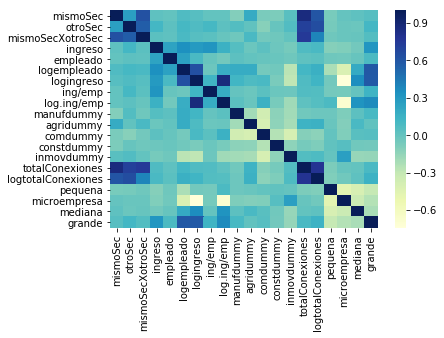

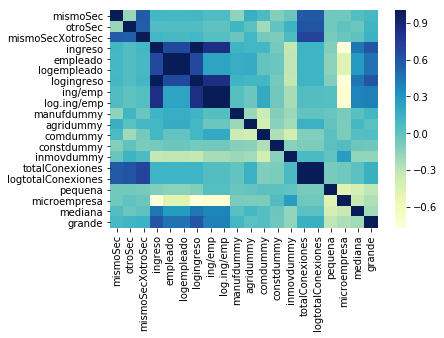

In [37]:
corr = dffinal.loc[:,['mismoSec','otroSec','mismoSecXotroSec','ingreso','empleado','logempleado','logingreso','ing/emp','log.ing/emp','manufdummy','agridummy','comdummy','constdummy', 'inmovdummy' ,'totalConexiones','logtotalConexiones','pequena','microempresa','mediana','grande'   ]].corr() 
sns.heatmap(corr,
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values,
            cmap='YlGnBu') 
plt.show()

corrS = dffinal.loc[:,['mismoSec','otroSec','mismoSecXotroSec','ingreso','empleado','logempleado','logingreso','ing/emp','log.ing/emp' ,'manufdummy','agridummy','comdummy','constdummy', 'inmovdummy','totalConexiones', 'logtotalConexiones','pequena','microempresa','mediana','grande']].corr(method ='spearman') 
sns.heatmap(corrS,
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values,
            cmap='YlGnBu') 
plt.show()

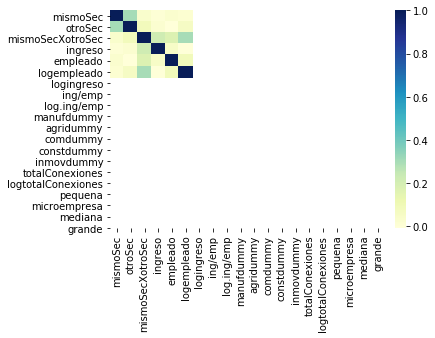

In [38]:
sns.heatmap(dftotalCon.iloc[:,1:7].corr(),
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values,
            cmap='YlGnBu') 
plt.show()

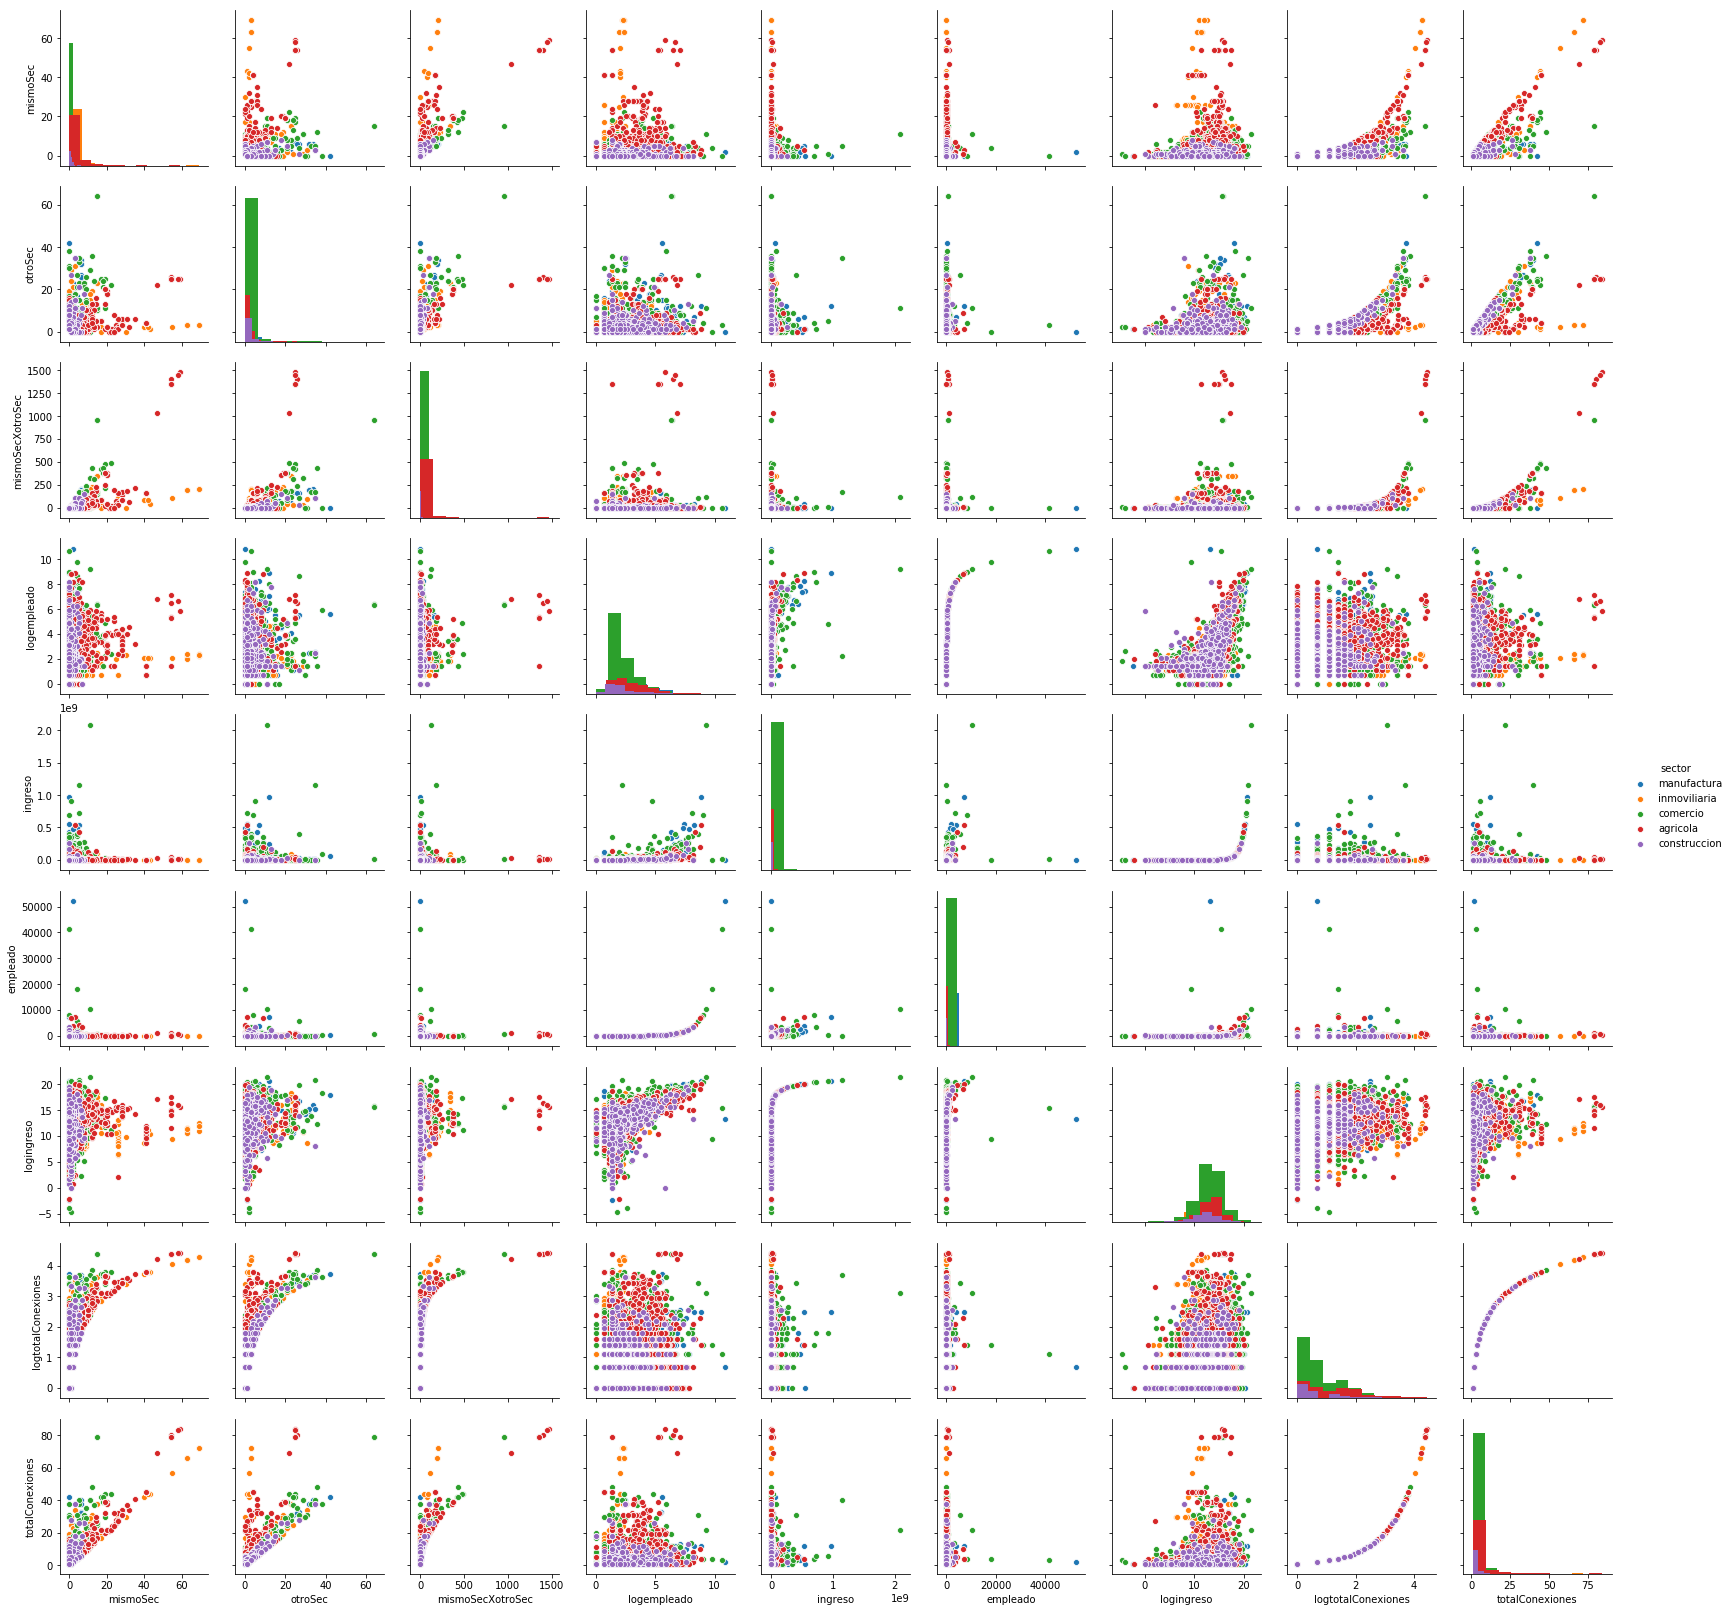

In [39]:
sns.pairplot(dffinal.loc[:,['mismoSec','otroSec','mismoSecXotroSec','logempleado','ingreso','empleado','logingreso','logtotalConexiones','totalConexiones','sector']], diag_kind="hist",hue="sector") 
plt.savefig('pairplot.png', bbox_inches='tight')
plt.show()

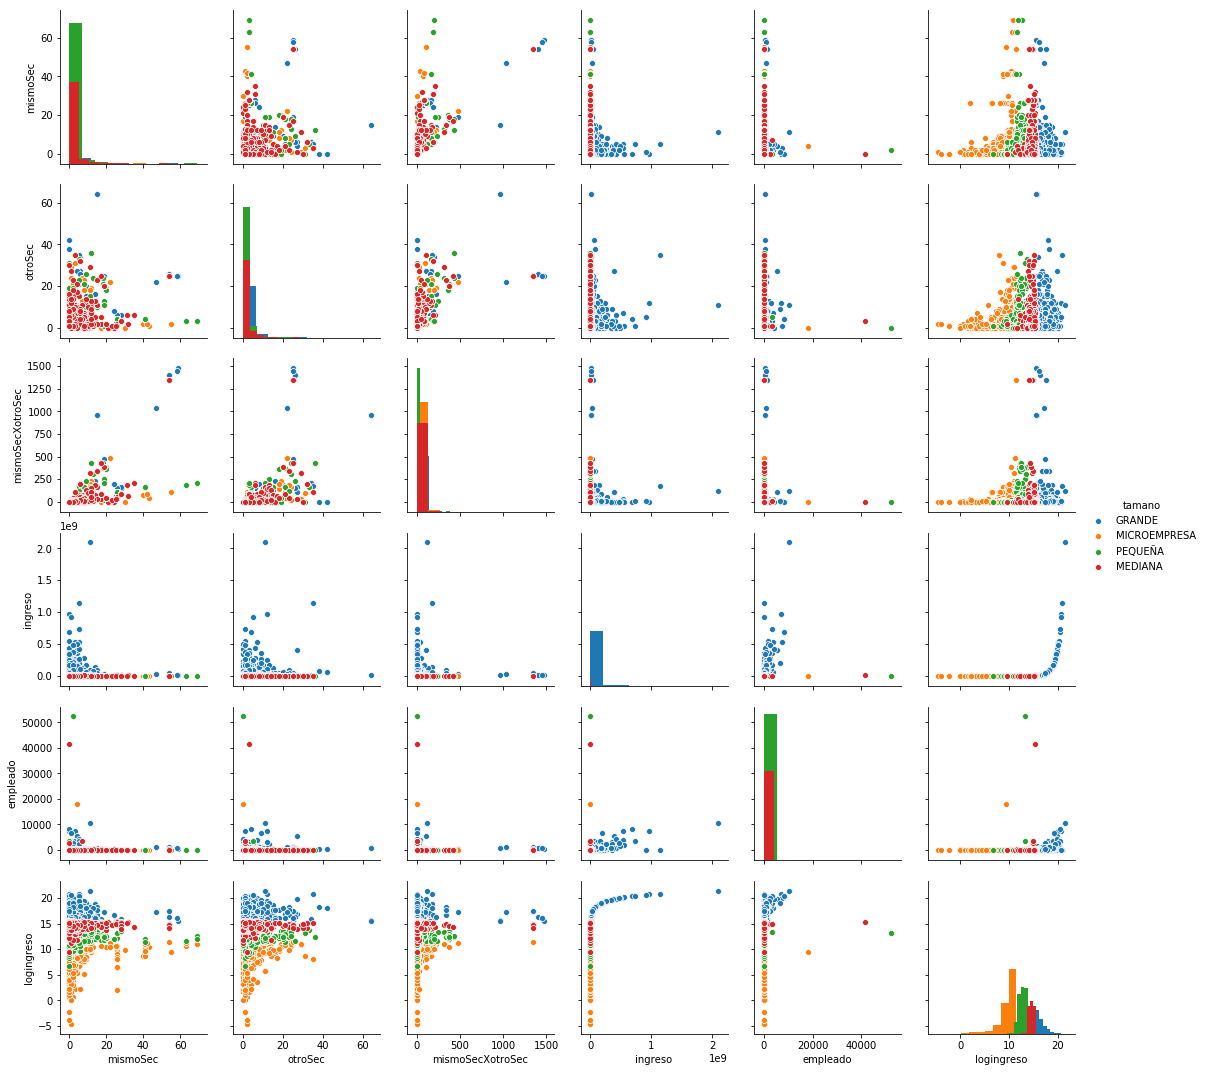

In [40]:
sns.pairplot(dffinal.loc[:,['mismoSec','otroSec','mismoSecXotroSec','ingreso','empleado','logingreso','tamano']], diag_kind="hist",hue="tamano") 
plt.savefig('pairplottam.png', bbox_inches='tight')
plt.show()

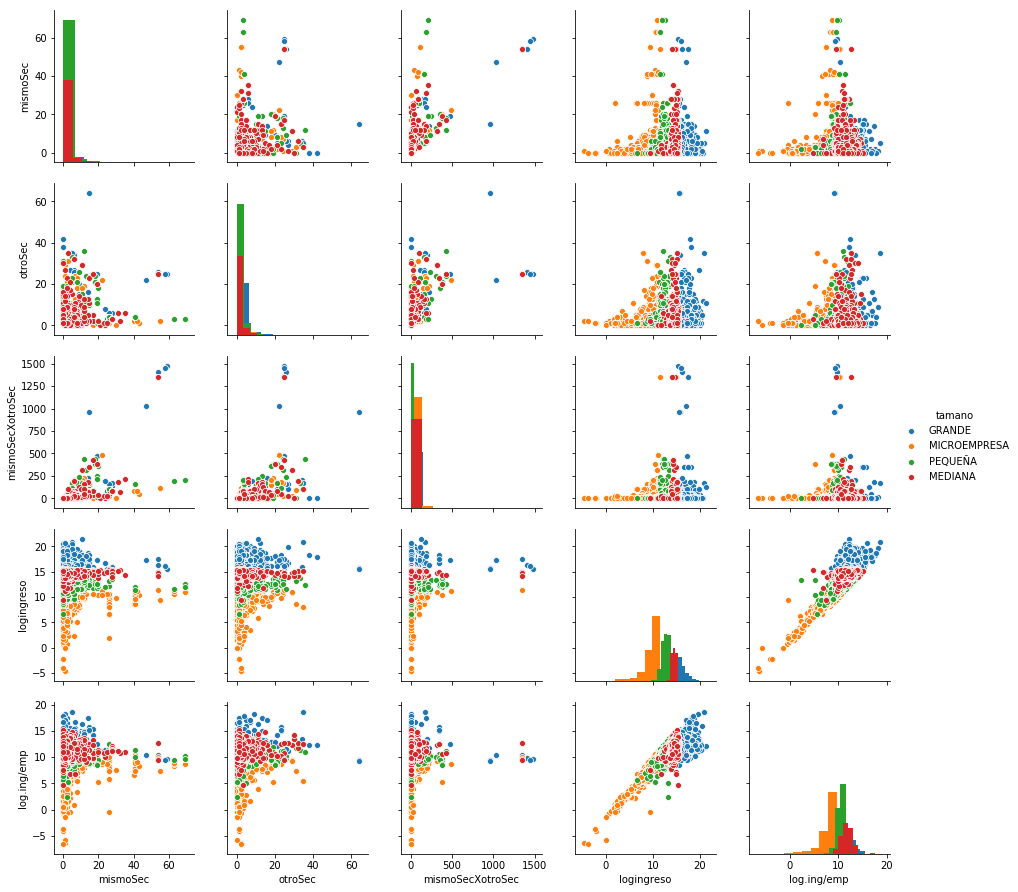

In [41]:
sns.pairplot(dffinal.loc[:,['mismoSec','otroSec','mismoSecXotroSec','logingreso','tamano','log.ing/emp']], diag_kind="hist",hue="tamano") 
#plt.savefig('pairplottam.png', bbox_inches='tight')
plt.show()

In [42]:
dffinal.columns

Index(['idEmp', 'mismoSec', 'otroSec', 'ingreso', 'empleado', 'mismoSecCuad',
       'otroSecCuad', 'logingreso', 'logempleado', 'ing/emp', 'loging/emp',
       'ingresoenmillones', 'ingenmill/emp', 'ingresoenmiles',
       'ingenmiles/emp', 'log.ing/emp', 'log.ingenmiles/emp', 'loging/logemp',
       'mismoSecXotroSec', 'totalConexiones', 'logtotalConexiones', 'sector',
       'manufdummy', 'agridummy', 'comdummy', 'constdummy', 'inmovdummy',
       'tamano', 'pequena', 'microempresa', 'mediana', 'grande'],
      dtype='object')

In [43]:
# grafico de top empresas de acuerdo a su total de conexiones
dftop = dffinal

listaname= []
for nombid in dftop['idEmp']:
    listaname.append(list(dftotalrank.loc[dftotalrank['EXPEDIENTE']== nombid,'NOMBRE'])[0])
    
dftop['nombre']= (listaname)
dftop = dftop.set_index('nombre')




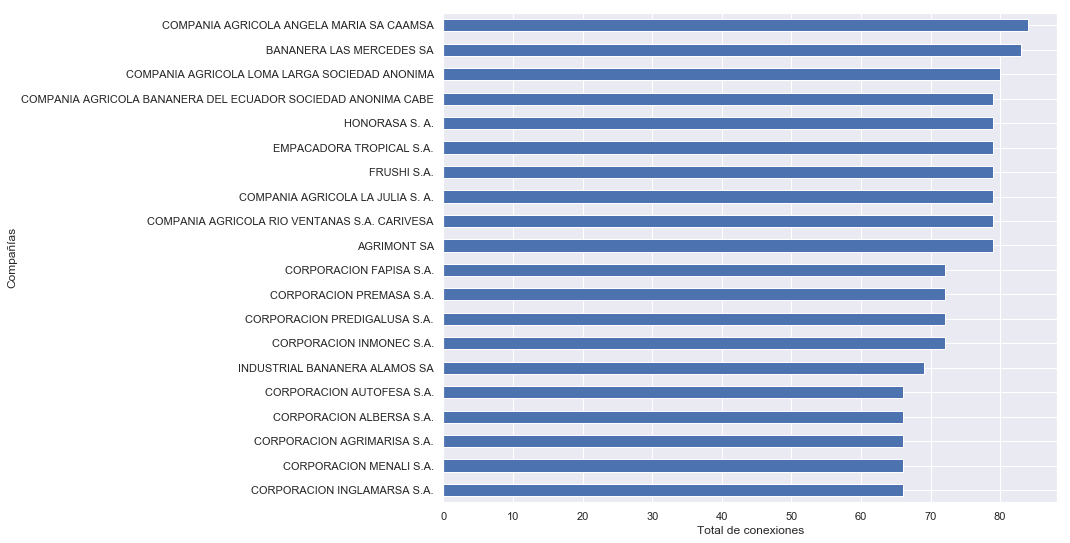

In [555]:
sns.set ()
dftop.sort_values('totalConexiones', ascending=False)[:20] [['totalConexiones']][::-1].plot(kind='barh',stacked=True, 
                                                                                            figsize=(11,9)) 
#plt.title("Top de empresas con mayor número de administradores compartidos durante el año 2018") 
plt.xlabel("Total de conexiones")
plt.ylabel("Compañías")
#plt.legend(loc="upper left") 
plt.legend().set_visible(False)
plt.savefig('rankingempconex.jpeg', bbox_inches='tight', dpi=100)


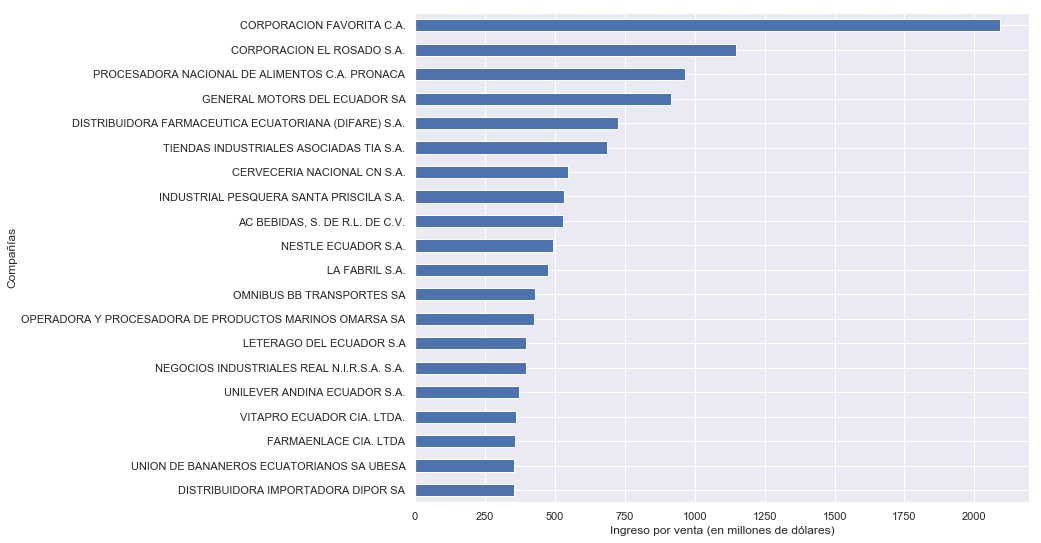

In [554]:
sns.set ()
dftop.sort_values('ingresoenmillones', ascending=False)[:20] [['ingresoenmillones']][::-1].plot(kind='barh',stacked=True, 
                                                                                                figsize=(11,9)) 
#plt.title("Top de empresas con mayor número de administradores compartidos durante el año 2018") 
plt.xlabel("Ingreso por venta (en millones de dólares)")
plt.ylabel("Compañías")
#plt.legend(loc="upper left") 
plt.legend().set_visible(False)
plt.savefig('rankingingenmillones.jpeg', bbox_inches='tight', dpi=100)


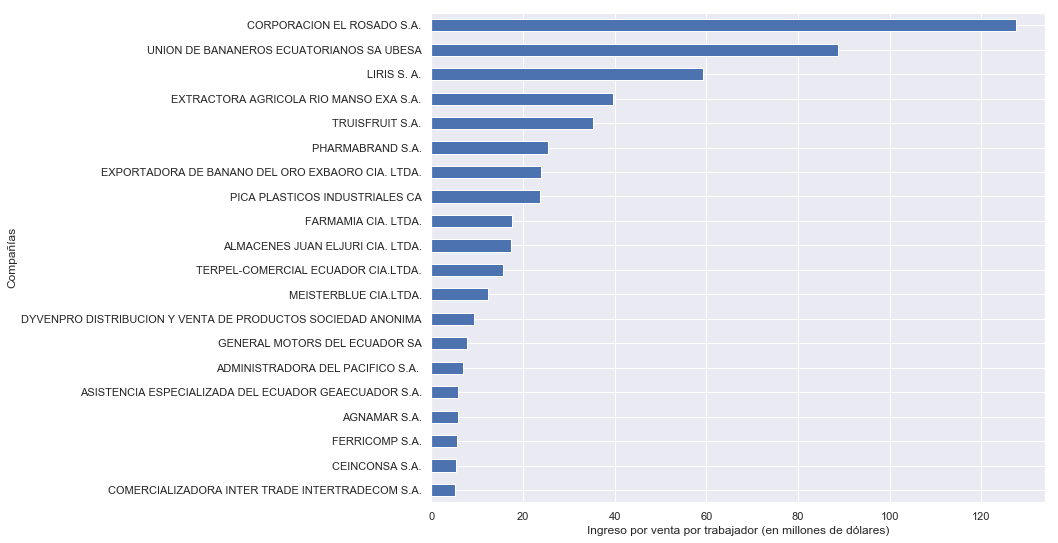

In [553]:
sns.set ()
dftop.sort_values('ingenmill/emp', ascending=False)[:20] [['ingenmill/emp']][::-1].plot(kind='barh',stacked=True,
                                                                                        figsize=(11,9)) 
#plt.title("Top de empresas con mayor número de administradores compartidos durante el año 2018") 
plt.xlabel("Ingreso por venta por trabajador (en millones de dólares)")
plt.ylabel("Compañías")
#plt.legend(loc="upper left") 
plt.legend().set_visible(False)
plt.savefig('rankingingenmillonesempleados.jpeg', bbox_inches='tight', dpi=100)


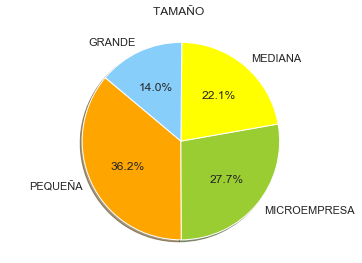

In [997]:
tam= list(pd.DataFrame(dffinal['tamano'].value_counts()).index.values)
valortam= list(dffinal['tamano'].value_counts())
colors = ['orange', 'yellowgreen', 'yellow', 'lightskyblue']
explode = (0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(valortam, explode=explode, labels=tam, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('TAMAÑO \n')
plt.axis('equal')
plt.savefig('pietamano.jpeg', bbox_inches='tight', dpi=100)
plt.show()

In [563]:
dffinal.loc[dffinal['sector']=='inmoviliaria','sector']='inmobiliaria'

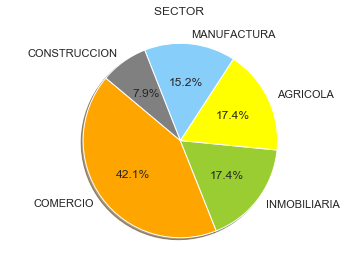

In [998]:

sec= list(pd.DataFrame(dffinal['sector'].value_counts()).index.values)
sec= ['COMERCIO', 'INMOBILIARIA', 'AGRICOLA', 'MANUFACTURA', 'CONSTRUCCION']
valorsect= list(dffinal['sector'].value_counts())
colors2 = ['orange', 'yellowgreen', 'yellow', 'lightskyblue','gray']
explode2 = (0, 0, 0, 0,0)  # explode 1st slice

# Plot
plt.pie(valorsect, explode=explode2, labels=sec, colors=colors2,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('SECTOR \n')
plt.axis('equal')
plt.savefig('piesector.jpeg', bbox_inches='tight', dpi=100)
plt.show()

In [49]:
# 'mismoSecCuad','otroSecCuad','mismoSec','otroSec','empleado','mismoSecXotroSec','manufdummy','agridummy','comdummy','constdummy','inmovdummy'   
X = dffinal.loc[:,['otroSec','mismoSec','empleado','mismoSecXotroSec','manufdummy','comdummy','constdummy','agridummy']]
y = dffinal["logingreso"]

# Note the difference in argument order
X =  sm.add_constant(X)
model = sm.OLS(y, X,).fit()

# Print out the statistics
model.summary()


C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             logingreso   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     141.5
Date:                Thu, 05 Sep 2019   Prob (F-statistic):          4.24e-225
Time:                        12:06:07   Log-Likelihood:                -20967.
No. Observations:                9070   AIC:                         4.195e+04
Df Residuals:                    9061   BIC:                         4.202e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.9569      0.067    163.724      0.000      10.826      11.088
otroSec              0.0838      0.010      8.611      0.000       0.065       0.103
mismoSec             0.0344      0.008      4.541      0.000       0.020       0.049
empleado             0.0003   3.33e-05      8.152      0.000       0.000       0.000
mismoSecXotroSec    -0.0024      0.001     -3.323      0.001      -0.004      -0.001
manufdummy           2.3386      0.091     25.794      0.000       2.161       2.516
comdummy             1.9594      0.074     26.587      0.000       1.815       2.104
constdummy           1.0320      0.110      9.340      0.000       0.815       1.249
agridummy            2.0370      0.088     23.237      0.000       1.865       2.209
==============================================================================
Omnibus:                     1470.676   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3977.011
Skew:                          -0.881   Prob(JB):                         0.00
Kurtosis:                       5.724   Cond. No.                     4.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# 'mismoSecCuad','otroSecCuad','mismoSec','otroSec','empleado','mismoSecXotroSec','manufdummy','agridummy','comdummy','constdummy','inmovdummy'   
X2 = dffinal.loc[:,['otroSec','mismoSec','logempleado','mismoSecXotroSec','manufdummy','comdummy','constdummy','agridummy']]
y2 = dffinal["ingreso"]

# Note the difference in argument order
X2 =  sm.add_constant(X2)
model2 = sm.OLS(y2, X2).fit()

# Print out the statistics
model2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ingreso   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     175.3
Date:                Thu, 05 Sep 2019   Prob (F-statistic):          2.50e-276
Time:                        12:06:07   Log-Likelihood:            -1.7078e+05
No. Observations:                9070   AIC:                         3.416e+05
Df Residuals:                    9061   BIC:                         3.416e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.963e+07    1.1e+06    -17.846      0.000   -2.18e+07   -1.75e+07
otroSec            1.36e+06   1.46e+05      9.339      0.000    1.07e+06    1.65e+06
mismoSec          2.219e+05   1.13e+05      1.964      0.050     389.461    4.43e+05
logempleado       1.068e+07   3.14e+05     34.003      0.000    1.01e+07    1.13e+07
mismoSecXotroSec -5.211e+04    1.1e+04     -4.742      0.000   -7.37e+04   -3.06e+04
manufdummy       -4.037e+06   1.42e+06     -2.850      0.004   -6.81e+06   -1.26e+06
comdummy          4.668e+05   1.12e+06      0.416      0.678   -1.73e+06    2.67e+06
constdummy       -3.866e+06   1.66e+06     -2.330      0.020   -7.12e+06   -6.14e+05
agridummy        -9.572e+06   1.37e+06     -6.998      0.000   -1.23e+07   -6.89e+06
==============================================================================
Omnibus:                    22942.579   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        553750260.858
Skew:                          27.858   Prob(JB):                         0.00
Kurtosis:                    1212.201   Cond. No.                         326.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# 'mismoSecCuad','otroSecCuad','mismoSec','otroSec','empleado','mismoSecXotroSec','manufdummy','agridummy','comdummy','constdummy','inmovdummy'   
X3 = dffinal.loc[:,['otroSec','mismoSec','logempleado','mismoSecXotroSec','manufdummy','comdummy','constdummy','agridummy']]
y3 = dffinal["logingreso"]

# Note the difference in argument order
X3 =  sm.add_constant(X3)
model3 = sm.OLS(y3, X3).fit()

# Print out the statistics
model3.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             logingreso   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     893.3
Date:                Thu, 05 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:06:08   Log-Likelihood:                -18864.
No. Observations:                9070   AIC:                         3.775e+04
Df Residuals:                    9061   BIC:                         3.781e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.1397      0.058    156.286      0.000       9.025       9.254
otroSec              0.0363      0.008      4.690      0.000       0.021       0.051
mismoSec             0.0186      0.006      3.088      0.002       0.007       0.030
logempleado          1.2337      0.017     73.837      0.000       1.201       1.266
mismoSecXotroSec    -0.0026      0.001     -4.441      0.000      -0.004      -0.001
manufdummy           0.6967      0.075      9.249      0.000       0.549       0.844
comdummy             1.0698      0.060     17.920      0.000       0.953       1.187
constdummy           0.2710      0.088      3.071      0.002       0.098       0.444
agridummy            0.4705      0.073      6.469      0.000       0.328       0.613
==============================================================================
Omnibus:                     2817.102   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18155.202
Skew:                          -1.332   Prob(JB):                         0.00
Kurtosis:                       9.398   Cond. No.                         326.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# 'mismoSecCuad','otroSecCuad','mismoSec','otroSec','empleado','mismoSecXotroSec','manufdummy','agridummy','comdummy','constdummy','inmovdummy'   
X4 = dffinal.loc[:,['mismoSec','otroSec','mismoSecXotroSec','empleado' ]]
y4 = dffinal["logingreso"]

# Note the difference in argument order
X4 =  sm.add_constant(X4)
model4 = sm.OLS(y4, X4).fit()

# Print out the statistics
model4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             logingreso   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     37.15
Date:                Thu, 05 Sep 2019   Prob (F-statistic):           7.29e-31
Time:                        12:06:08   Log-Likelihood:                -21427.
No. Observations:                9070   AIC:                         4.286e+04
Df Residuals:                    9065   BIC:                         4.290e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.6168      0.035    363.167      0.000      12.549      12.685
mismoSec             0.0250      0.008      3.197      0.001       0.010       0.040
otroSec              0.0639      0.010      6.309      0.000       0.044       0.084
mismoSecXotroSec    -0.0013      0.001     -1.688      0.091      -0.003       0.000
empleado             0.0003    3.5e-05      8.904      0.000       0.000       0.000
==============================================================================
Omnibus:                     1034.880   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2218.175
Skew:                          -0.708   Prob(JB):                         0.00
Kurtosis:                       4.966   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# 'mismoSecCuad','otroSecCuad','mismoSec','otroSec','empleado','mismoSecXotroSec','manufdummy','agridummy','comdummy','constdummy','inmovdummy' ,'pequena','mediana','grande'   
X5 = dffinal.loc[:,['mismoSec','otroSec','mismoSecXotroSec' ,'pequena','mediana','grande' ]]
y5 = dffinal["logingreso"]

# Note the difference in argument order
X5 =  sm.add_constant(X5)
model5 = sm.OLS(y5, X5).fit()

# Print out the statistics
model5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             logingreso   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     5968.
Date:                Thu, 05 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:06:08   Log-Likelihood:                -14246.
No. Observations:                9070   AIC:                         2.851e+04
Df Residuals:                    9063   BIC:                         2.856e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.6436      0.025    381.250      0.000       9.594       9.693
mismoSec             0.0100      0.004      2.832      0.005       0.003       0.017
otroSec              0.0166      0.005      3.606      0.000       0.008       0.026
mismoSecXotroSec    -0.0006      0.000     -1.820      0.069      -0.001     4.9e-05
pequena              2.9569      0.031     95.693      0.000       2.896       3.017
mediana              4.8374      0.035    138.668      0.000       4.769       4.906
grande               6.8703      0.040    170.707      0.000       6.791       6.949
==============================================================================
Omnibus:                     5667.707   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125284.227
Skew:                          -2.615   Prob(JB):                         0.00
Kurtosis:                      20.440   Cond. No.                         232.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# 'mismoSecCuad','otroSecCuad','mismoSec','otroSec','empleado','mismoSecXotroSec','manufdummy','agridummy','comdummy','constdummy','inmovdummy' ,'pequena','mediana','grande'   
X6 = dffinal.loc[:,['mismoSec','otroSec','mismoSecXotroSec' ,'pequena','mediana','grande' ]]
y6 = dffinal["log.ing/emp"]

# Note the difference in argument order
X6 =  sm.add_constant(X6)
model6 = sm.OLS(y6, X6).fit()

# Print out the statistics
model6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log.ing/emp   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     1860.
Date:                Thu, 05 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:06:08   Log-Likelihood:                -15568.
No. Observations:                9070   AIC:                         3.115e+04
Df Residuals:                    9063   BIC:                         3.120e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.1778      0.029    279.470      0.000       8.120       8.235
mismoSec             0.0069      0.004      1.681      0.093      -0.001       0.015
otroSec              0.0090      0.005      1.679      0.093      -0.002       0.019
mismoSecXotroSec    -0.0017      0.000     -4.091      0.000      -0.002      -0.001
pequena              2.4769      0.036     69.291      0.000       2.407       2.547
mediana              3.4747      0.040     86.102      0.000       3.396       3.554
grande               4.0969      0.047     87.996      0.000       4.006       4.188
==============================================================================
Omnibus:                     4229.664   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55940.159
Skew:                          -1.892   Prob(JB):                         0.00
Kurtosis:                      14.563   Cond. No.                         232.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

# Creo un modelo de regresión lineal
modelo = linear_model.LinearRegression()
 
# Entreno el modelo con los datos (X,Y)
modelo.fit(X5, y5)
# Ahora puedo obtener el coeficiente b_1
print('Coeficiente beta1: ', modelo.coef_[0])
 
# Podemos predecir usando el modelo
y_pred = modelo.predict(X5)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^2
print('Error cuadrático medio: %.2f' % mean_squared_error(y5, y_pred))
print('Estadístico R_2: %.2f' % r2_score(y5, y_pred))


Coeficiente beta1:  0.0
Error cuadrático medio: 1.35
Estadístico R_2: 0.80


In [56]:
# neighbour oveer lap -para arcos
# Creo un modelo de regresión lineal
modelo2 = linear_model.LinearRegression()
 
# Entreno el modelo con los datos (X,Y)
modelo2.fit(X6, y6)
# Ahora puedo obtener el coeficiente b_1
print('Coeficiente beta1: ', modelo2.coef_[0])
 
# Podemos predecir usando el modelo
y_pred6 = modelo2.predict(X6)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^2
print('Error cuadrático medio: %.2f' % mean_squared_error(y6, y_pred6))
print('Estadístico R_2: %.2f' % r2_score(y6, y_pred6))

Coeficiente beta1:  0.0
Error cuadrático medio: 1.81
Estadístico R_2: 0.55


In [57]:
diccIntercval

{100030: [(136680, 1)],
 100340: [(124324, 1)],
 100341: [(105650, 1)],
 100545: [(105866, 1)],
 10067: [(42238, 1)],
 10086: [(1922, 2)],
 100901: [(304039, 1),
  (6277, 1),
  (105479, 1),
  (25763, 1),
  (44632, 3),
  (56418, 2),
  (59559, 2),
  (65984, 1),
  (82682, 1)],
 100922: [(27893, 1)],
 100959: [(122244, 1)],
 101079: [(309991, 1), (710893, 1)],
 101311: [(112013, 2), (709513, 2), (109615, 2)],
 101335: [(102764, 2), (103998, 2)],
 101377: [(708879, 1)],
 101496: [(127938, 1)],
 101536: [(130398, 1)],
 101587: [(132925, 1)],
 101611: [(172773, 1), (58946, 2), (119059, 1), (129852, 1)],
 101719: [(9726, 1), (40093, 2)],
 101772: [(126273, 1)],
 102097: [(42707, 1), (123121, 1), (42485, 1)],
 102514: [(180749, 1),
  (104277, 1),
  (136076, 1),
  (177062, 1),
  (41035, 1),
  (41204, 1),
  (59248, 1),
  (714967, 1),
  (99736, 1)],
 102555: [(28138, 2), (4767, 2), (56877, 1), (76393, 2)],
 102665: [(44958, 1)],
 102731: [(56422, 2), (58014, 1), (58346, 2)],
 102942: [(116039, 1)]

In [58]:
# len(diccIntercval)
idgrafo= np.array(list(diccIntercval.keys()))

label= []
for valorid in idgrafo:
    label.append(list(dftotalrank.loc[dftotalrank['EXPEDIENTE']== valorid,'NOMBRE'])[0])
    

In [59]:
conlistunicas=[]
for keydicc, listadicc in diccIntercval.items():
    for tupla in listadicc:
        ver1= (keydicc, tupla[0],tupla[1])
        ver2= (tupla[0],keydicc, tupla[1])
        if (ver1 not in conlistunicas) & (ver2 not in conlistunicas):
            conlistunicas.append(ver1)
            
            
listsource=[]
listtarget=[]
listweight=[]
for source, target, weight in conlistunicas:
    listsource.append(source)
    listtarget.append(target)
    listweight.append(weight)

In [60]:
dfgephi=pd.DataFrame(np.array(listsource))
dfgephi.rename(columns={0:'Source'},inplace=True)
dfgephi['Target']= np.array(listtarget)
dfgephi['Weight'] = np.array(listweight) 
dfgephi['Label']= ['conexion']*len(listsource)
dfgephi['Type']=['directed']*len(listsource)


dfnodos= pd.DataFrame(np.array(idgrafo))
dfnodos.rename(columns={0:'ID'},inplace=True)
dfnodos['Label']= np.array(label)


In [61]:
#dfnodos.to_excel('nodos.xlsx')
#dfgephi.to_excel('arcos.xlsx')
#dfgephi.iloc[:,:2].to_csv('arcosnodosmet.csv')

In [62]:
dfnodos.head()

ID                                              Label
0  100030         CARROCERIAS BUSCAR'S KARINA BUSKARINA S.A.
1  100340                                     TASCKCORP S.A.
2  100341                                        NICOAT S.A.
3  100545  FERRO INDUSTRIAL - COMERCIAL WONG C. LTDA. FER...
4   10067  INCOPECA INDUSTRIA CORPORATIVA PESQUERA AMERIC...

In [63]:
dfgephi.head()

Source  Target  Weight     Label      Type
0  100030  136680       1  conexion  directed
1  100340  124324       1  conexion  directed
2  100341  105650       1  conexion  directed
3  100545  105866       1  conexion  directed
4   10067   42238       1  conexion  directed

In [111]:
dfnodosid= pd.DataFrame(np.array(label))
dfnodosid.rename(columns={0:'ID'},inplace=True)
dfnodosid['Label']= np.array(idgrafo)


labelsource  = []
for valorsource in dfgephi['Source']:
    labelsource.append(list(dftotalrank.loc[dftotalrank['EXPEDIENTE']== valorsource,'NOMBRE'])[0])
    
labeltarget  = []
for valortarget in dfgephi['Target']:
    labeltarget.append(list(dftotalrank.loc[dftotalrank['EXPEDIENTE']== valortarget,'NOMBRE'])[0])

    
dfgephicorr=pd.DataFrame(np.array(labelsource))
dfgephicorr.rename(columns={0:'Source'},inplace=True)
dfgephicorr['Target']= np.array(labeltarget)
dfgephicorr['Weight'] = np.array(listweight) 
dfgephicorr['Label']= ['conexion']*len(listsource)
dfgephicorr['Type']=['indirected']*len(listsource)

#dfnodosid.to_excel('nodoscorr.xlsx')
#dfgephicorr.to_excel('arcoscorr.xlsx')

In [112]:
# importo datos de centralidad provenientes de gephi
from scipy import stats 
from scipy.stats import zscore

central= pd.read_csv('gephimetricas.csv')
central['eigenminmax'] = (central['eigencentrality'] - central['eigencentrality'].min()) / (central['eigencentrality'].max() - central['eigencentrality'].min())
central['eigenzscore'] = stats.zscore(central['eigencentrality'])



In [113]:
central.tail(10)

Id  Label  timeset  \
9060                                     INMAIA S.A.  99722      NaN   
9061             AGRICOLA SANTA MARIA S.A. AGRISAMSA  99736      NaN   
9062  LABORATORIOS Y CRIADEROS MARINOS LACRIMAR S.A.  99748      NaN   
9063                                   ESCAMDUS S.A.  99767      NaN   
9064                     PREDIAL INMOBILIARIA MAX SA   9978      NaN   
9065                                    BRESSON S.A.  99821      NaN   
9066                                  CAPEXPORT S.A.  99844      NaN   
9067                           AEROCOMBUSTIBLES S.A.  99849      NaN   
9068                                     EMARIS S.A.  99941      NaN   
9069       FOURTH DIMENSION TRADING, FD TRADING S.A.  99983      NaN   

      modularity_class  eigencentrality  eigenminmax  eigenzscore  
9060                82         0.000454     0.000000    -0.149404  
9061              1155         0.025968     0.025526     0.184027  
9062               678         0.000454     0.000000    -0.149404  
9063                32         0.000454     0.000000    -0.149404  
9064                18         0.001091     0.000637    -0.141079  
9065              2019         0.001849     0.001396    -0.131173  
9066              2401         0.005453     0.005001    -0.084074  
9067               463         0.001091     0.000637    -0.141079  
9068               815         0.001279     0.000825    -0.138622  
9069               897         0.000454     0.000000    -0.149404

In [114]:
dffinal['eigencentrality']= central['eigencentrality']
dffinal['eigenminmax']= central['eigenminmax']
dffinal['eigenzscore']= central['eigenzscore']


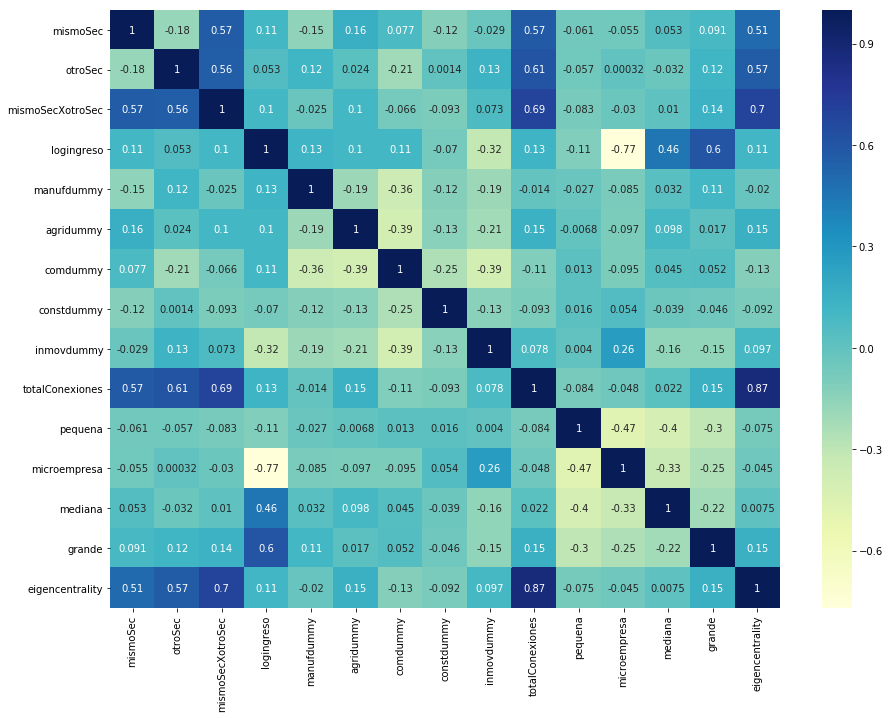

In [255]:

plt.figure(figsize = (15,11))
corrEig = dffinal.loc[:,['mismoSec','otroSec','mismoSecXotroSec','logingreso','manufdummy','agridummy','comdummy','constdummy', 'inmovdummy','totalConexiones','pequena','microempresa','mediana','grande','eigencentrality']].corr(method ='spearman') 
sns.heatmap(corrEig,
      xticklabels=corrEig.columns.values, 
      yticklabels=corrEig.columns.values,
            cmap='YlGnBu', annot=True) 
plt.show()

In [116]:
dffinal.iloc[:,1:].corr(method ='spearman')

mismoSec   otroSec   ingreso  empleado  mismoSecCuad  \
mismoSec            1.000000 -0.176304  0.107768  0.098290      1.000000   
otroSec            -0.176304  1.000000  0.053450  0.057482     -0.176304   
ingreso             0.107768  0.053450  1.000000  0.665302      0.107768   
empleado            0.098290  0.057482  0.665302  1.000000      0.098290   
mismoSecCuad        1.000000 -0.176304  0.107768  0.098290      1.000000   
otroSecCuad        -0.176304  1.000000  0.053450  0.057482     -0.176304   
logingreso          0.107768  0.053450  1.000000  0.665302      0.107768   
logempleado         0.098290  0.057482  0.665302  1.000000      0.098290   
ing/emp             0.060520  0.005111  0.838677  0.226844      0.060520   
loging/emp         -0.086272 -0.062497 -0.497847 -0.959868     -0.086272   
ingresoenmillones   0.107768  0.053450  1.000000  0.665302      0.107768   
ingenmill/emp       0.060519  0.005112  0.838677  0.226844      0.060519   
ingresoenmiles      0.107768  0.053450  1.000000  0.665302      0.107768   
ingenmiles/emp      0.060520  0.005112  0.838677  0.226844      0.060520   
log.ing/emp         0.060520  0.005111  0.838677  0.226844      0.060520   
log.ingenmiles/emp  0.060520  0.005112  0.838677  0.226844      0.060520   
loging/logemp      -0.073030 -0.066855 -0.344636 -0.890511     -0.073030   
mismoSecXotroSec    0.570024  0.561892  0.102733  0.094100      0.570024   
totalConexiones     0.571540  0.606196  0.125732  0.122447      0.571540   
logtotalConexiones  0.571540  0.606196  0.125732  0.122447      0.571540   
manufdummy         -0.151303  0.120581  0.128206  0.169665     -0.151303   
agridummy           0.160122  0.023637  0.104335  0.179859      0.160122   
comdummy            0.076842 -0.208884  0.108494 -0.011741      0.076842   
constdummy         -0.123435  0.001425 -0.070347 -0.035035     -0.123435   
inmovdummy         -0.029076  0.133332 -0.316706 -0.299957     -0.029076   
pequena            -0.060578 -0.057111 -0.111951 -0.141289     -0.060578   
microempresa       -0.054718  0.000319 -0.769158 -0.471211     -0.054718   
mediana             0.053060 -0.032364  0.456345  0.279302      0.053060   
grande              0.090934  0.117247  0.600811  0.468980      0.090934   
eigencentrality     0.505869  0.569008  0.114408  0.101021      0.505869   
eigenminmax         0.505869  0.569008  0.114408  0.101021      0.505869   
eigenzscore         0.505869  0.569008  0.114408  0.101021      0.505869   

                    otroSecCuad  logingreso  logempleado   ing/emp  \
mismoSec              -0.176304    0.107768     0.098290  0.060520   
otroSec                1.000000    0.053450     0.057482  0.005111   
ingreso                0.053450    1.000000     0.665302  0.838677   
empleado               0.057482    0.665302     1.000000  0.226844   
mismoSecCuad          -0.176304    0.107768     0.098290  0.060520   
otroSecCuad            1.000000    0.053450     0.057482  0.005111   
logingreso             0.053450    1.000000     0.665302  0.838677   
logempleado            0.057482    0.665302     1.000000  0.226844   
ing/emp                0.005111    0.838677     0.226844  1.000000   
loging/emp            -0.062497   -0.497847    -0.959868 -0.024245   
ingresoenmillones      0.053450    1.000000     0.665302  0.838677   
ingenmill/emp          0.005112    0.838677     0.226844  1.000000   
ingresoenmiles         0.053450    1.000000     0.665302  0.838677   
ingenmiles/emp         0.005112    0.838677     0.226844  1.000000   
log.ing/emp            0.005111    0.838677     0.226844  1.000000   
log.ingenmiles/emp     0.005112    0.838677     0.226844  1.000000   
loging/logemp         -0.066855   -0.344636    -0.890511  0.135207   
mismoSecXotroSec       0.561892    0.102733     0.094100  0.045938   
totalConexiones        0.606196    0.125732     0.122447  0.050719   
logtotalConexiones     0.606196    0.125732     0.122447  0.050719   
manufdummy             0.120581    0.1282

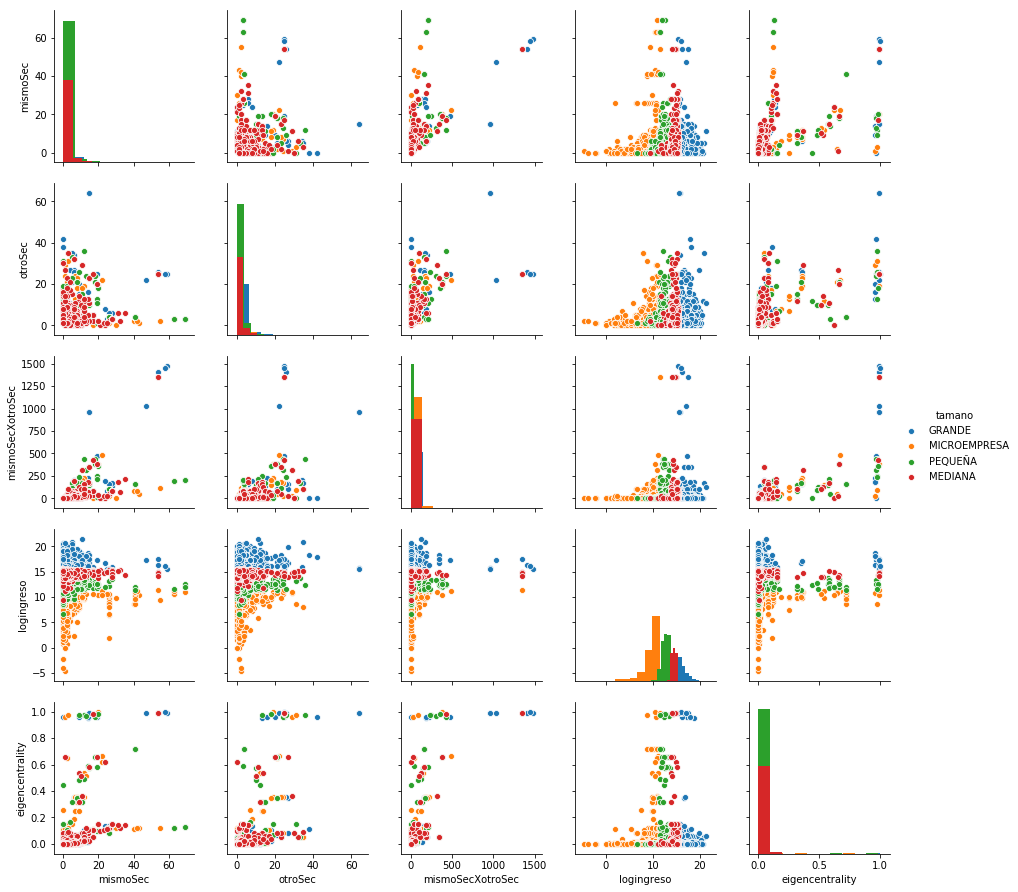

In [117]:
sns.pairplot(dffinal.loc[:,['mismoSec','otroSec','mismoSecXotroSec','logingreso','tamano','eigencentrality']], diag_kind="hist",hue="tamano") 
#plt.savefig('pairplottam.png', bbox_inches='tight')
plt.show()

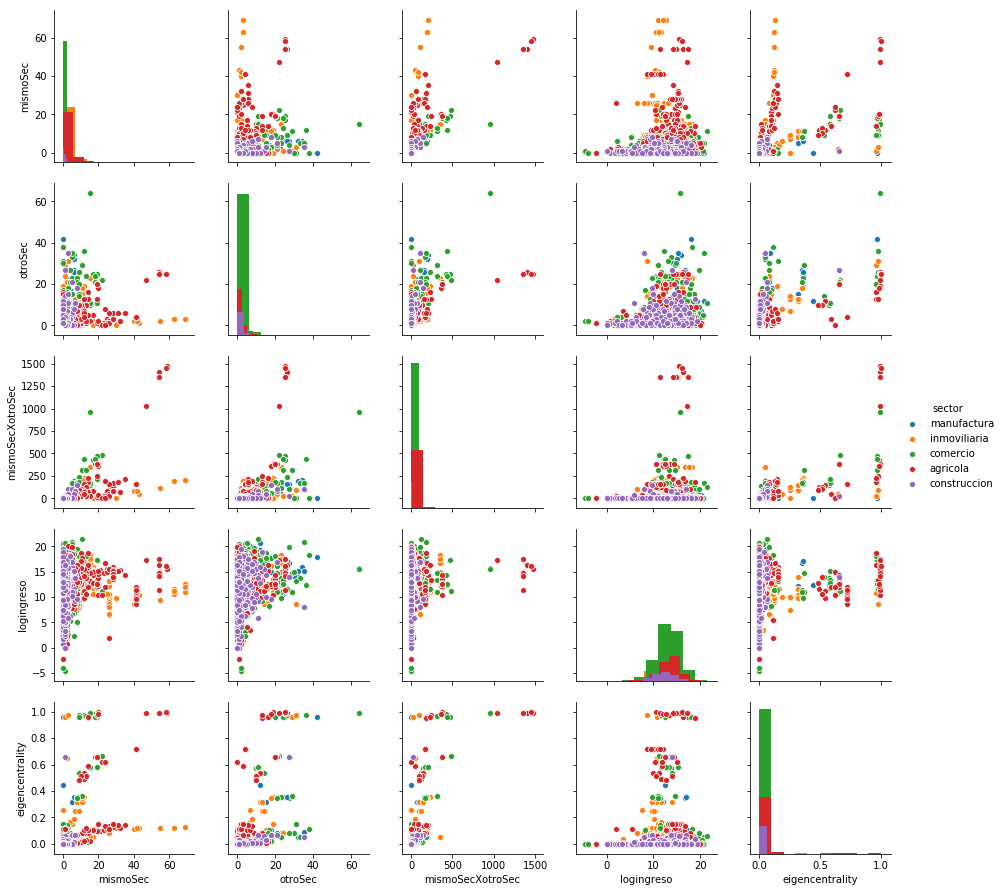

In [118]:
sns.pairplot(dffinal.loc[:,['mismoSec','otroSec','mismoSecXotroSec','logingreso','sector','eigencentrality']], diag_kind="hist",hue="sector") 
#plt.savefig('pairplottam.png', bbox_inches='tight')
plt.show()

<Figure size 504x504 with 0 Axes>

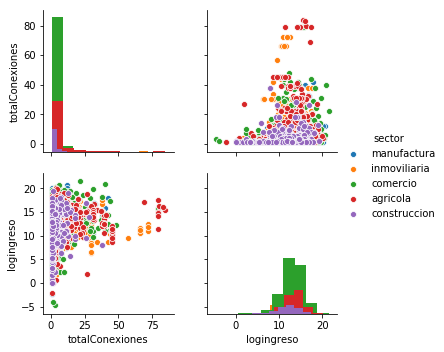

In [119]:
plt.figure(figsize = (7,7))
sns.pairplot(dffinal.loc[:,['totalConexiones','logingreso','sector']], diag_kind="hist",hue="sector") 
#plt.savefig('pairplottam.png', bbox_inches='tight')
plt.show()

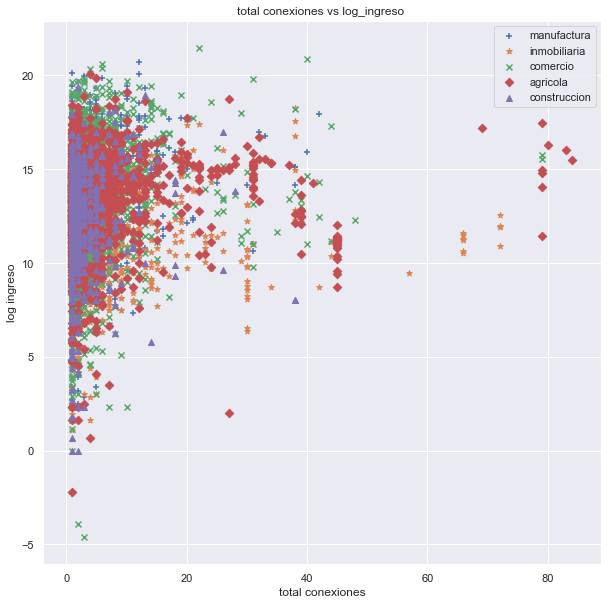

In [567]:

plt.figure(figsize=(10,10))

plt.scatter(dffinal.loc[dffinal['sector']== 'manufactura','totalConexiones'], dffinal.loc[dffinal['sector']== 'manufactura','logingreso'], label='manufactura',marker='+')
plt.scatter(dffinal.loc[dffinal['sector']== 'inmobiliaria','totalConexiones'], dffinal.loc[dffinal['sector']== 'inmobiliaria','logingreso'], label='inmobiliaria',marker='*')
plt.scatter(dffinal.loc[dffinal['sector']== 'comercio','totalConexiones'], dffinal.loc[dffinal['sector']== 'comercio','logingreso'], label='comercio',marker='x')
plt.scatter(dffinal.loc[dffinal['sector']== 'agricola','totalConexiones'], dffinal.loc[dffinal['sector']== 'agricola','logingreso'], label='agricola',marker='D')
plt.scatter(dffinal.loc[dffinal['sector']== 'construccion','totalConexiones'], dffinal.loc[dffinal['sector']== 'construccion','logingreso'], label='construccion',marker='^')

plt.title('total conexiones vs log_ingreso ')
plt.xlabel('total conexiones')
plt.ylabel('log ingreso')

plt.legend() 

plt.show()


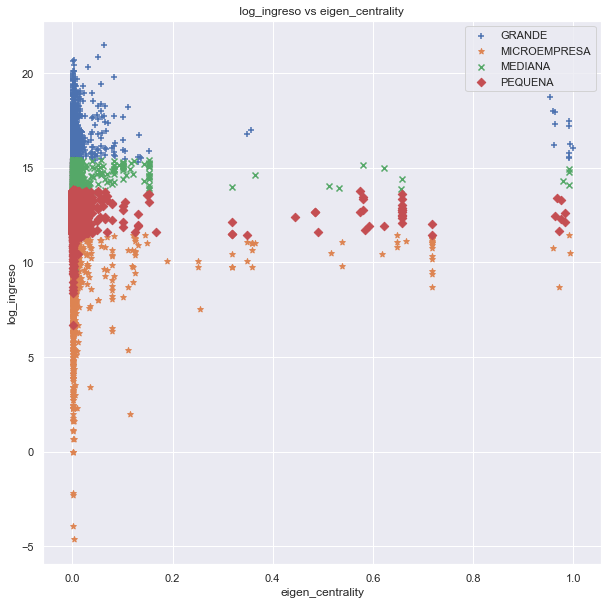

In [618]:
plt.figure(figsize=(10,10))

plt.scatter(x=dffinal.loc[dffinal['tamano']== 'GRANDE','eigencentrality'], y= dffinal.loc[dffinal['tamano']== 'GRANDE','logingreso'], label='GRANDE',marker='+')
plt.scatter(x=dffinal.loc[dffinal['tamano']== 'MICROEMPRESA','eigencentrality'],y=  dffinal.loc[dffinal['tamano']== 'MICROEMPRESA','logingreso'], label='MICROEMPRESA',marker='*')
plt.scatter(x= dffinal.loc[dffinal['tamano']== 'MEDIANA','eigencentrality'], y= dffinal.loc[dffinal['tamano']== 'MEDIANA','logingreso'], label='MEDIANA',marker='x')
plt.scatter(x= dffinal.loc[dffinal['tamano']== 'PEQUEÑA','eigencentrality'], y= dffinal.loc[dffinal['tamano']== 'PEQUEÑA','logingreso'], label='PEQUENA',marker='D')

plt.title(' log_ingreso vs eigen_centrality ')
plt.ylabel('log_ingreso')
plt.xlabel('eigen_centrality')

plt.legend() 

plt.show()

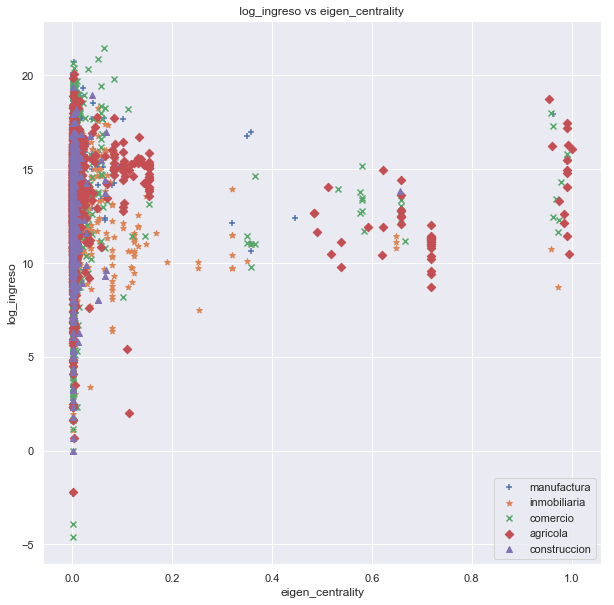

In [620]:
plt.figure(figsize=(10,10))

plt.scatter(x= dffinal.loc[dffinal['sector']== 'manufactura','eigencentrality'], y= dffinal.loc[dffinal['sector']== 'manufactura','logingreso'], label='manufactura',marker='+')
plt.scatter(x = dffinal.loc[dffinal['sector']== 'inmobiliaria','eigencentrality'],y=  dffinal.loc[dffinal['sector']== 'inmobiliaria','logingreso'], label='inmobiliaria',marker='*')
plt.scatter(x= dffinal.loc[dffinal['sector']== 'comercio','eigencentrality'], y= dffinal.loc[dffinal['sector']== 'comercio','logingreso'], label='comercio',marker='x')
plt.scatter(x= dffinal.loc[dffinal['sector']== 'agricola','eigencentrality'], y= dffinal.loc[dffinal['sector']== 'agricola','logingreso'], label='agricola',marker='D')
plt.scatter(x= dffinal.loc[dffinal['sector']== 'construccion','eigencentrality'],y=  dffinal.loc[dffinal['sector']== 'construccion','logingreso'], label='construccion',marker='^')

plt.title(' log_ingreso vs eigen_centrality ')
plt.ylabel('log_ingreso')
plt.xlabel('eigen_centrality')

plt.legend() 

plt.show()

In [123]:
# dffinal.to_excel('todasMasEigen.xlsx')

In [77]:
# dicexp todos los id empresa con nombre de admnistradores
# diccIntercval nombre de empresas que solo utilizo

listaTotalCargo = []
for empresa,lista_conex in diccIntercval.items():
    for emp_conex, valorconex in lista_conex:
        listaNombre= list(set(dicexp[empresa]) & set(dicexp[emp_conex]))
        for nombEmp in listaNombre:
            cargoAdm= list(np.unique(dfadm.loc[dfadm['administrador']== nombEmp,'cargo']))[0]
            listaTotalCargo.append(cargoAdm)
    
    
#pd.DataFrame(listaTotalCargo).to_excel('todosCargos.xlsx')   

In [435]:
dfCargos= pd.DataFrame(listaTotalCargo)
dfCargos.rename(columns={0:'cargo'},inplace=True)
dfCargos.loc[dfCargos['cargo']=='GERENTE'] = 'GERENTE GENERAL'

# hay 49 cargos unicos
# len(dfCargos['cargo'].unique())

In [437]:
dftopcargo = pd.DataFrame( list(pd.DataFrame(dfCargos['cargo'].value_counts()).index.values))
dftopcargo.rename(columns={0:'cargo'},inplace=True)
dftopcargo['cantidad']= list(dfCargos['cargo'].value_counts())
dftopcargo = dftopcargo.set_index('cargo')


In [441]:
#dffinal['totalConexiones'].sum()

34566

In [534]:
+.38

0.38

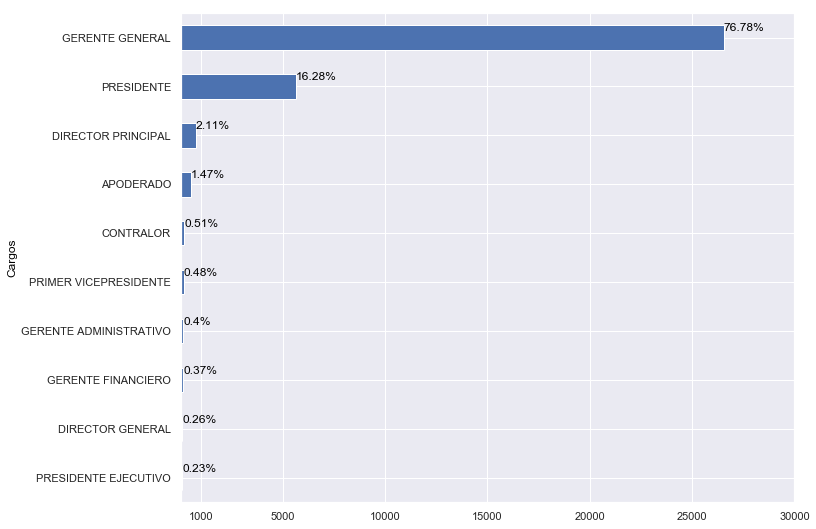

In [556]:
#plt.figure(figsize = (7,7))
# dffinal['mismoSec'].sum()+ dffinal['otroSec'].sum()
# 34566 en total

sns.set ()
bb= dftopcargo.sort_values('cantidad', ascending=False)[:10] [['cantidad']][::-1].plot(kind='barh',stacked=True,
                                                                                        figsize=(11,9)) 
#plt.title("Top de empresas con mayor número de administradores compartidos durante el año 2018") 
bb.set_xticks([ 1000,5000, 10000, 15000, 20000,25000,30000])

#plt.xlabel("Cantidad",size=12)
plt.ylabel("Cargos",size=12,color='black')
#plt.legend(loc="upper left") 
plt.legend().set_visible(False)


for a in bb.patches:
    # get_width pulls left or right; get_y pushes up or down
    bb.text(a.get_width()+.3, a.get_y()+.38, \
            str(round((a.get_width()/ dffinal['totalConexiones'].sum())*100, 2))+'%', fontsize=12,color='black')

#plt.rcParams['grid.color'] = "#cccccc"
#plt.rc('grid', linestyle="-", color='black')
plt.savefig('rankingconexiones.jpeg', bbox_inches='tight', dpi=100)

plt.show()

In [81]:
# 'manufdummy','comdummy','constdummy','agridummy'

X7 = dffinal.loc[:,['eigencentrality','otroSec','mismoSec','mismoSecXotroSec', 'pequena','mediana','grande']]
y7 = dffinal["logingreso"]

# Note the difference in argument order
X7 =  sm.add_constant(X7)
model7 = sm.OLS(y7, X7,).fit()

# Print out the statistics
model7.summary()

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             logingreso   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     5116.
Date:                Thu, 05 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:14:43   Log-Likelihood:                -14246.
No. Observations:                9070   AIC:                         2.851e+04
Df Residuals:                    9062   BIC:                         2.856e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.6458      0.025    379.687      0.000       9.596       9.696
eigencentrality      0.2388      0.259      0.922      0.356      -0.269       0.746
otroSec              0.0153      0.005      3.141      0.002       0.006       0.025
mismoSec             0.0090      0.004      2.399      0.016       0.002       0.016
mismoSecXotroSec    -0.0008      0.000     -2.039      0.041      -0.002   -3.05e-05
pequena              2.9571      0.031     95.696      0.000       2.897       3.018
mediana              4.8389      0.035    138.564      0.000       4.770       4.907
grande               6.8732      0.040    170.246      0.000       6.794       6.952
==============================================================================
Omnibus:                     5666.669   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125302.232
Skew:                          -2.614   Prob(JB):                         0.00
Kurtosis:                      20.442   Cond. No.                     1.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
# 'manufdummy','comdummy','constdummy','agridummy'
# 'pequena','mediana','grande'

X8 = dffinal.loc[:,['eigencentrality','pequena','mediana','grande']]
y8 = dffinal["logingreso"]

# Note the difference in argument order
X8 =  sm.add_constant(X8)
model8 = sm.OLS(y8, X8,).fit()

# Print out the statistics
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             logingreso   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     8940.
Date:                Thu, 05 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:14:44   Log-Likelihood:                -14253.
No. Observations:                9070   AIC:                         2.852e+04
Df Residuals:                    9065   BIC:                         2.855e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.6817      0.023    414.500      0.000       9.636       9.727
eigencentrality     0.5137      0.160      3.212      0.001       0.200       0.827
pequena             2.9529      0.031     95.586      0.000       2.892       3.013
mediana             4.8403      0.035    138.660      0.000       4.772       4.909
grande              6.8860      0.040    171.798      0.000       6.807       6.965
==============================================================================
Omnibus:                     5665.597   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125660.036
Skew:                          -2.613   Prob(JB):                         0.00
Kurtosis:                      20.470   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
dfnodosMas= dfnodosid.copy()
del dfnodosMas['Label']
dfnodosMas['Label']= dfnodosid['ID']
dfnodosMas['ingreso']= dffinal['ingreso']
dfnodosMas['empleado']= dffinal['empleado']
dfnodosMas['tamano']= dffinal['tamano']
dfnodosMas['sector']= dffinal['sector']

utilidadlista = []
for idutilidad in dfnodosid['Label']:
    utilidadlista.append(list(adm.loc[adm['expediente']== idutilidad,'utilidad_perdida'].unique())[0])
    
dffinal['utilidad']= np.array(utilidadlista)

patrimoniolista = []
for idpat in dfnodosid['Label']:
    patrimoniolista.append(list(adm.loc[adm['expediente']== idpat,'patrimonio'].unique())[0])
    
activolista = []
for idact in dfnodosid['Label']:
    activolista.append(list(adm.loc[adm['expediente']== idact,'activos'].unique())[0])

dffinal['patrimonio']= np.array(patrimoniolista)
dffinal['activo']= np.array(activolista)
dffinal['roe']= dffinal['utilidad']/dffinal['patrimonio']
dffinal['roa']= dffinal['utilidad']/dffinal['activo']


dfnodosMas['utilidad']= dffinal['utilidad']
dfnodosMas['patrimonio']= dffinal['patrimonio']
dfnodosMas['activo']= dffinal['activo']
dfnodosMas['roe']= dffinal['roe']
dfnodosMas['roa']= dffinal['roa']

# dfnodosMas.to_excel('nodosAgregados.xlsx')
#dffinal.to_excel('datafinalConNuevo.xlsx')

In [759]:
valore_grafo= pd.read_csv('act-valor.csv')
dffinal['Authority'] = valore_grafo['Authority']
dffinal['Hub']= valore_grafo['Hub']
dffinal['Eccentricity']= (valore_grafo['Eccentricity']- valore_grafo['Eccentricity'].min()) / (valore_grafo['Eccentricity'].max() - valore_grafo['Eccentricity'].min())
dffinal['closnesscentrality'] = valore_grafo['closnesscentrality']
dffinal['harmonicclosnesscentrality'] = valore_grafo['harmonicclosnesscentrality']
dffinal['betweenesscentrality'] = valore_grafo['betweenesscentrality']
dffinal['weighted degree']=  valore_grafo['weighted degree']
dffinal['degree'] = valore_grafo['degree']
dffinal['clustering'] = valore_grafo['clustering'] 
dffinal['triangles'] = valore_grafo['triangles'] 
dffinal['rat']= dffinal['ingreso'] / dffinal['activo']
dffinal['autonomia_financiera']= dffinal['patrimonio'] / dffinal['activo']
dffinal['pasivo']= dffinal['activo']- dffinal['patrimonio']





In [761]:
round(dffinal.iloc[:,1:].corr(method ='spearman'),3)#.iloc[:,31:]

mismoSec  otroSec  ingreso  empleado  \
mismoSec                       1.000   -0.176    0.108     0.098   
otroSec                       -0.176    1.000    0.053     0.057   
ingreso                        0.108    0.053    1.000     0.665   
empleado                       0.098    0.057    0.665     1.000   
mismoSecCuad                   1.000   -0.176    0.108     0.098   
otroSecCuad                   -0.176    1.000    0.053     0.057   
logingreso                     0.108    0.053    1.000     0.665   
logempleado                    0.098    0.057    0.665     1.000   
ing/emp                        0.061    0.005    0.839     0.227   
loging/emp                    -0.086   -0.062   -0.498    -0.960   
ingresoenmillones              0.108    0.053    1.000     0.665   
ingenmill/emp                  0.061    0.005    0.839     0.227   
ingresoenmiles                 0.108    0.053    1.000     0.665   
ingenmiles/emp                 0.061    0.005    0.839     0.227   
log.ing/emp                    0.061    0.005    0.839     0.227   
log.ingenmiles/emp             0.061    0.005    0.839     0.227   
loging/logemp                 -0.073   -0.067   -0.345    -0.891   
mismoSecXotroSec               0.570    0.562    0.103     0.094   
totalConexiones                0.572    0.606    0.126     0.122   
logtotalConexiones             0.572    0.606    0.126     0.122   
manufdummy                    -0.151    0.121    0.128     0.170   
agridummy                      0.160    0.024    0.104     0.180   
comdummy                       0.077   -0.209    0.108    -0.012   
constdummy                    -0.123    0.001   -0.070    -0.035   
inmovdummy                    -0.029    0.133   -0.317    -0.300   
pequena                       -0.061   -0.057   -0.112    -0.141   
microempresa                  -0.055    0.000   -0.769    -0.471   
mediana                        0.053   -0.032    0.456     0.279   
grande                         0.091    0.117    0.601     0.469   
eigencentrality                0.506    0.569    0.114     0.101   
eigenminmax                    0.506    0.569    0.114     0.101   
eigenzscore                    0.506    0.569    0.114     0.101   
utilidad                       0.034    0.027    0.508     0.298   
patrimonio                     0.105    0.176    0.617     0.450   
activo                         0.131    0.201    0.743     0.537   
roe                           -0.017   -0.079    0.134     0.016   
roa                           -0.012   -0.060    0.214     0.076   
Authority                      0.081    0.082    0.021     0.032   
Hub                            0.081    0.082    0.021     0.032   
Eccentricity                   0.229    0.306    0.103     0.078   
closnesscentrality            -0.193   -0.269   -0.094    -0.067   
harmonicclosnesscentrality    -0.186   -0.261   -0.092    -0.066   
betweenesscentrality           0.145    0.194    0.110     0.063   
weighted degree                0.572    0.606    0.126     0.122   
degree                         0.538    0.594    0.119     0.107   
clustering                     0.401    0.431    0.069     0.074   
triangles                      0.537    0.583    0.111     0.102   
rat                           -0.013   -0.177    0.474     0.256   
autonomia_financiera          -0.004    0.049   -0.066    -0.037   
pasivo                         0.117    0.152    0.757     0.553   

                            mismoSecCuad  otroSecCuad  logingreso  \
mismoSec                           1.000       -0.176       0.108   
otroSec                           -0.176        1.000       0.053   
ingreso                            0.108        0.053       1.000   
empleado                           0.098        0.057       0.665   
mismoSecCuad                       1.000       -0.176       0.108   
otroSecCuad                       -0.176        1.000       0.053   
logingreso                         0.108        0.053       1.000   
logempl

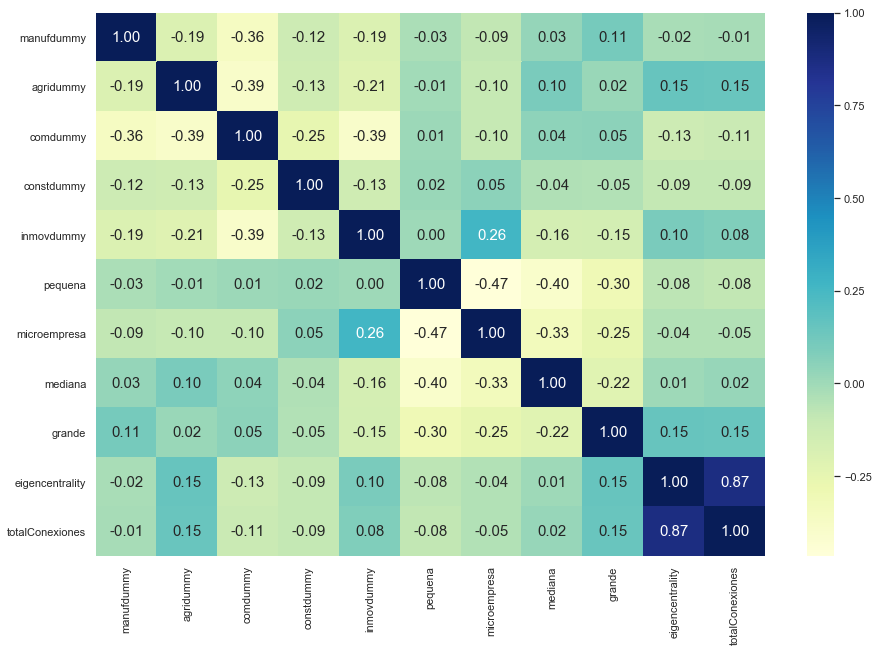

In [975]:
plt.figure(figsize = (15,10))
sns.heatmap(dffinal.loc[:,['manufdummy','agridummy','comdummy','constdummy', 'inmovdummy','pequena','microempresa','mediana','grande','eigencentrality','totalConexiones'
                             ]].corr(method ='spearman') ,
      xticklabels =dffinal.loc[:,['manufdummy','agridummy','comdummy','constdummy', 'inmovdummy','pequena','microempresa','mediana','grande','eigencentrality','totalConexiones'
                             ]].corr(method ='spearman') .columns.values, 
      yticklabels =dffinal.loc[:,['manufdummy','agridummy','comdummy','constdummy', 'inmovdummy','pequena','microempresa','mediana','grande','eigencentrality','totalConexiones'
                             ]].corr(method ='spearman') .columns.values,
            cmap='YlGnBu', annot=True,fmt='.2f', annot_kws={"size": 15}) 
plt.show()


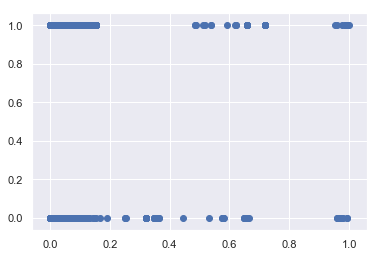

In [969]:
plt.scatter(dffinal['eigencentrality'], dffinal['agridummy'])

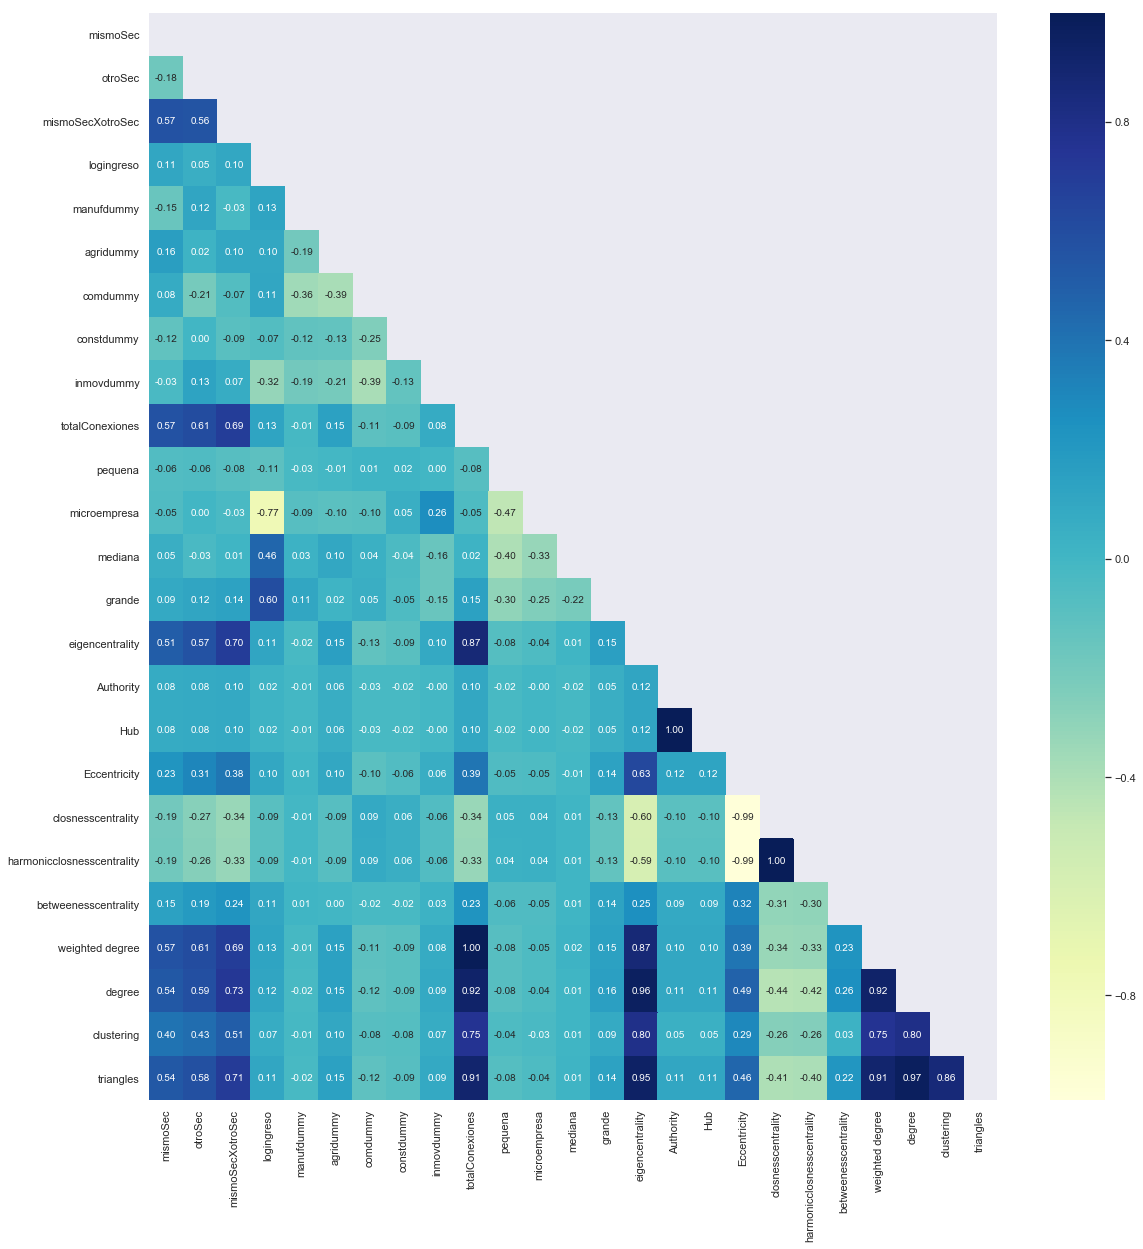

In [726]:
plt.figure(figsize = (19,20))

corrEigaum = dffinal.loc[:,['mismoSec','otroSec','mismoSecXotroSec','logingreso','manufdummy','agridummy','comdummy','constdummy', 'inmovdummy','totalConexiones','pequena','microempresa','mediana','grande','eigencentrality','Authority',
                           'Hub','Eccentricity','closnesscentrality','harmonicclosnesscentrality','betweenesscentrality','weighted degree','degree','clustering', 'triangles'     ]].corr(method ='spearman') 
mascara = np.zeros_like(corrEigaum)
mascara[np.triu_indices_from(mascara)] = True

sns.heatmap(corrEigaum,
      xticklabels =corrEigaum.columns.values, 
      yticklabels =corrEigaum.columns.values,
            cmap='YlGnBu', annot=True,mask=mascara,fmt='.2f', annot_kws={"size": 10}) 
plt.show()

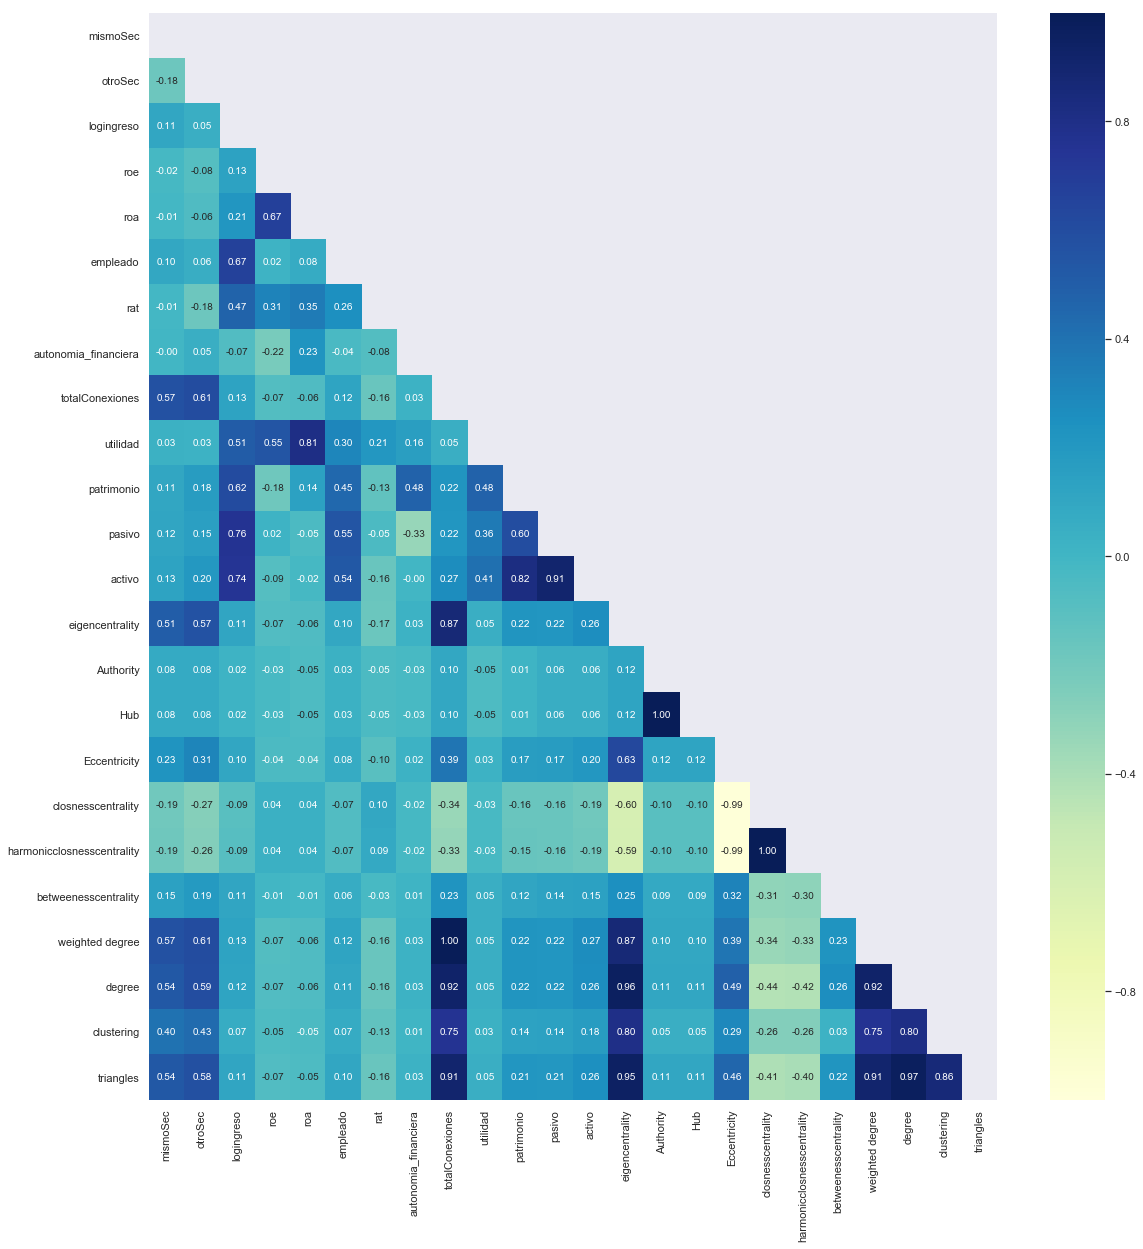

In [727]:
plt.figure(figsize = (19,20))

corrInd= dffinal.loc[:,['mismoSec','otroSec','logingreso','roe','roa','empleado','rat','autonomia_financiera',
                        'totalConexiones','utilidad','patrimonio','pasivo','activo','eigencentrality','Authority',
                           'Hub','Eccentricity','closnesscentrality','harmonicclosnesscentrality','betweenesscentrality',
                        'weighted degree','degree','clustering', 'triangles'     ]].corr(method ='spearman') 
mascaraind = np.zeros_like(corrInd)
mascaraind[np.triu_indices_from(corrInd)] = True

sns.heatmap(corrInd,
      xticklabels =corrInd.columns.values, 
      yticklabels =corrInd.columns.values,
            cmap='YlGnBu', annot=True,mask=mascaraind,fmt='.2f', annot_kws={"size": 10},vmin = - 1 , vmax = 1 , center = 0 ) 
plt.show()

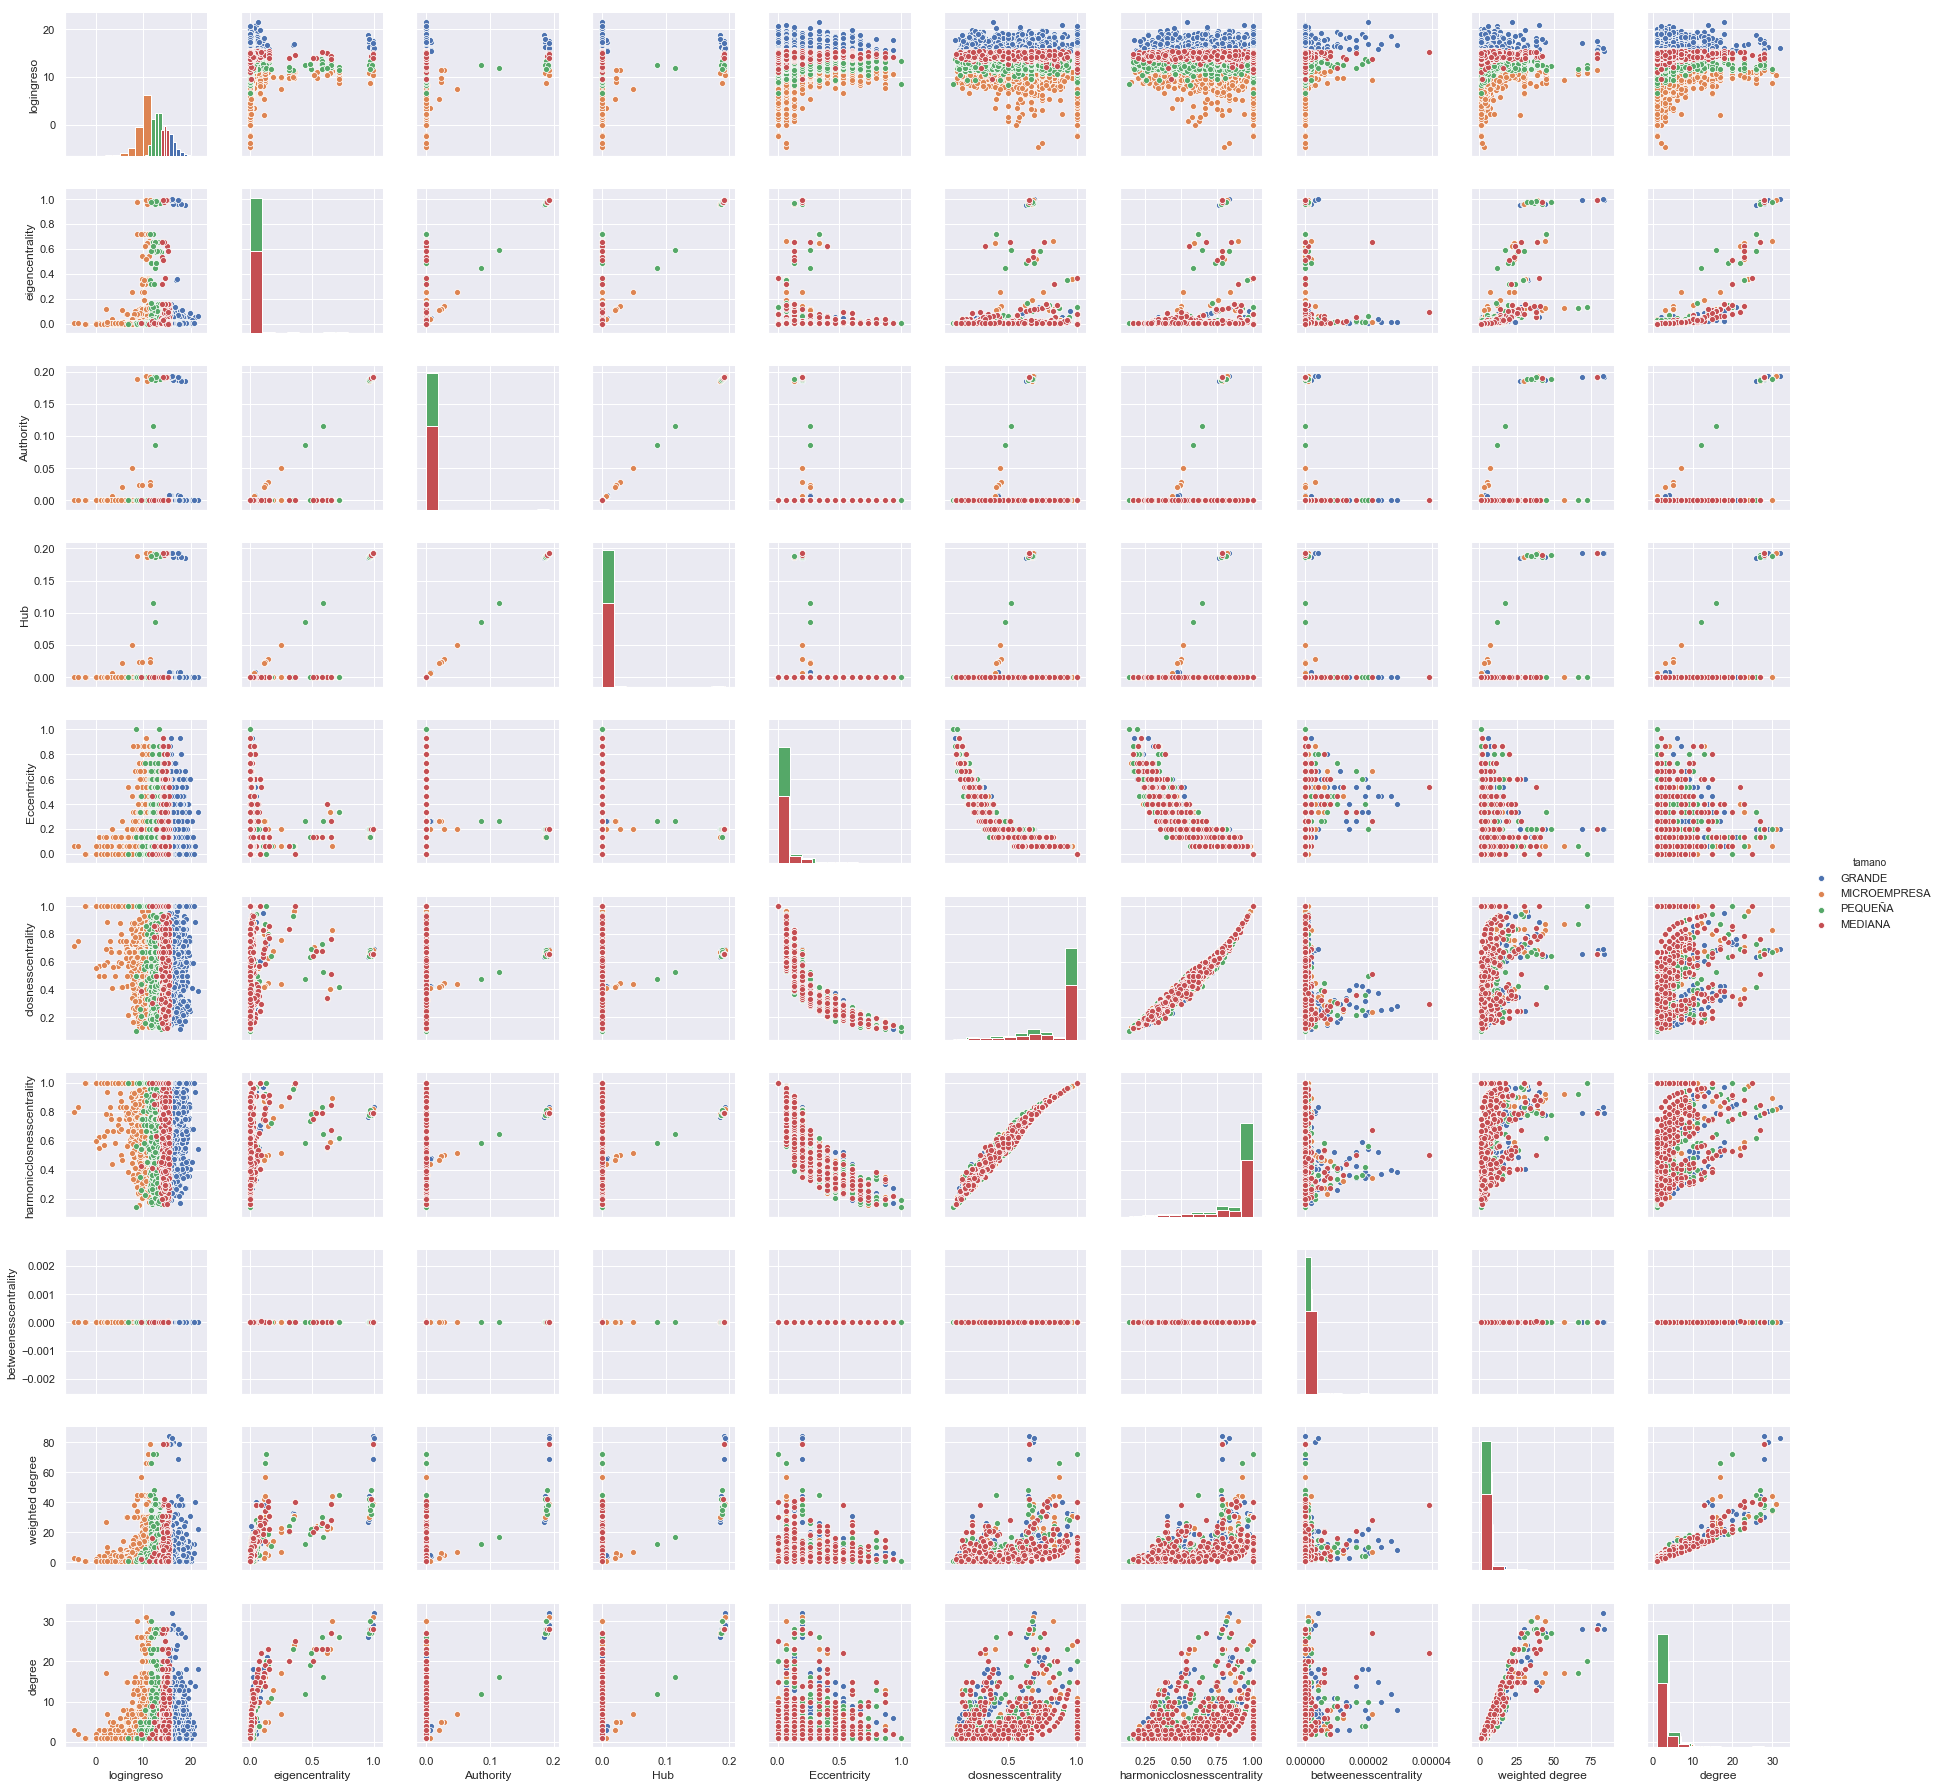

In [728]:
sns.pairplot(dffinal.loc[:,['logingreso','tamano','eigencentrality','Authority',
                           'Hub','Eccentricity','closnesscentrality','harmonicclosnesscentrality','betweenesscentrality',
                        'weighted degree','degree' ]], diag_kind="hist",hue="tamano") 
#plt.savefig('pairplottam.png', bbox_inches='tight')
plt.show()

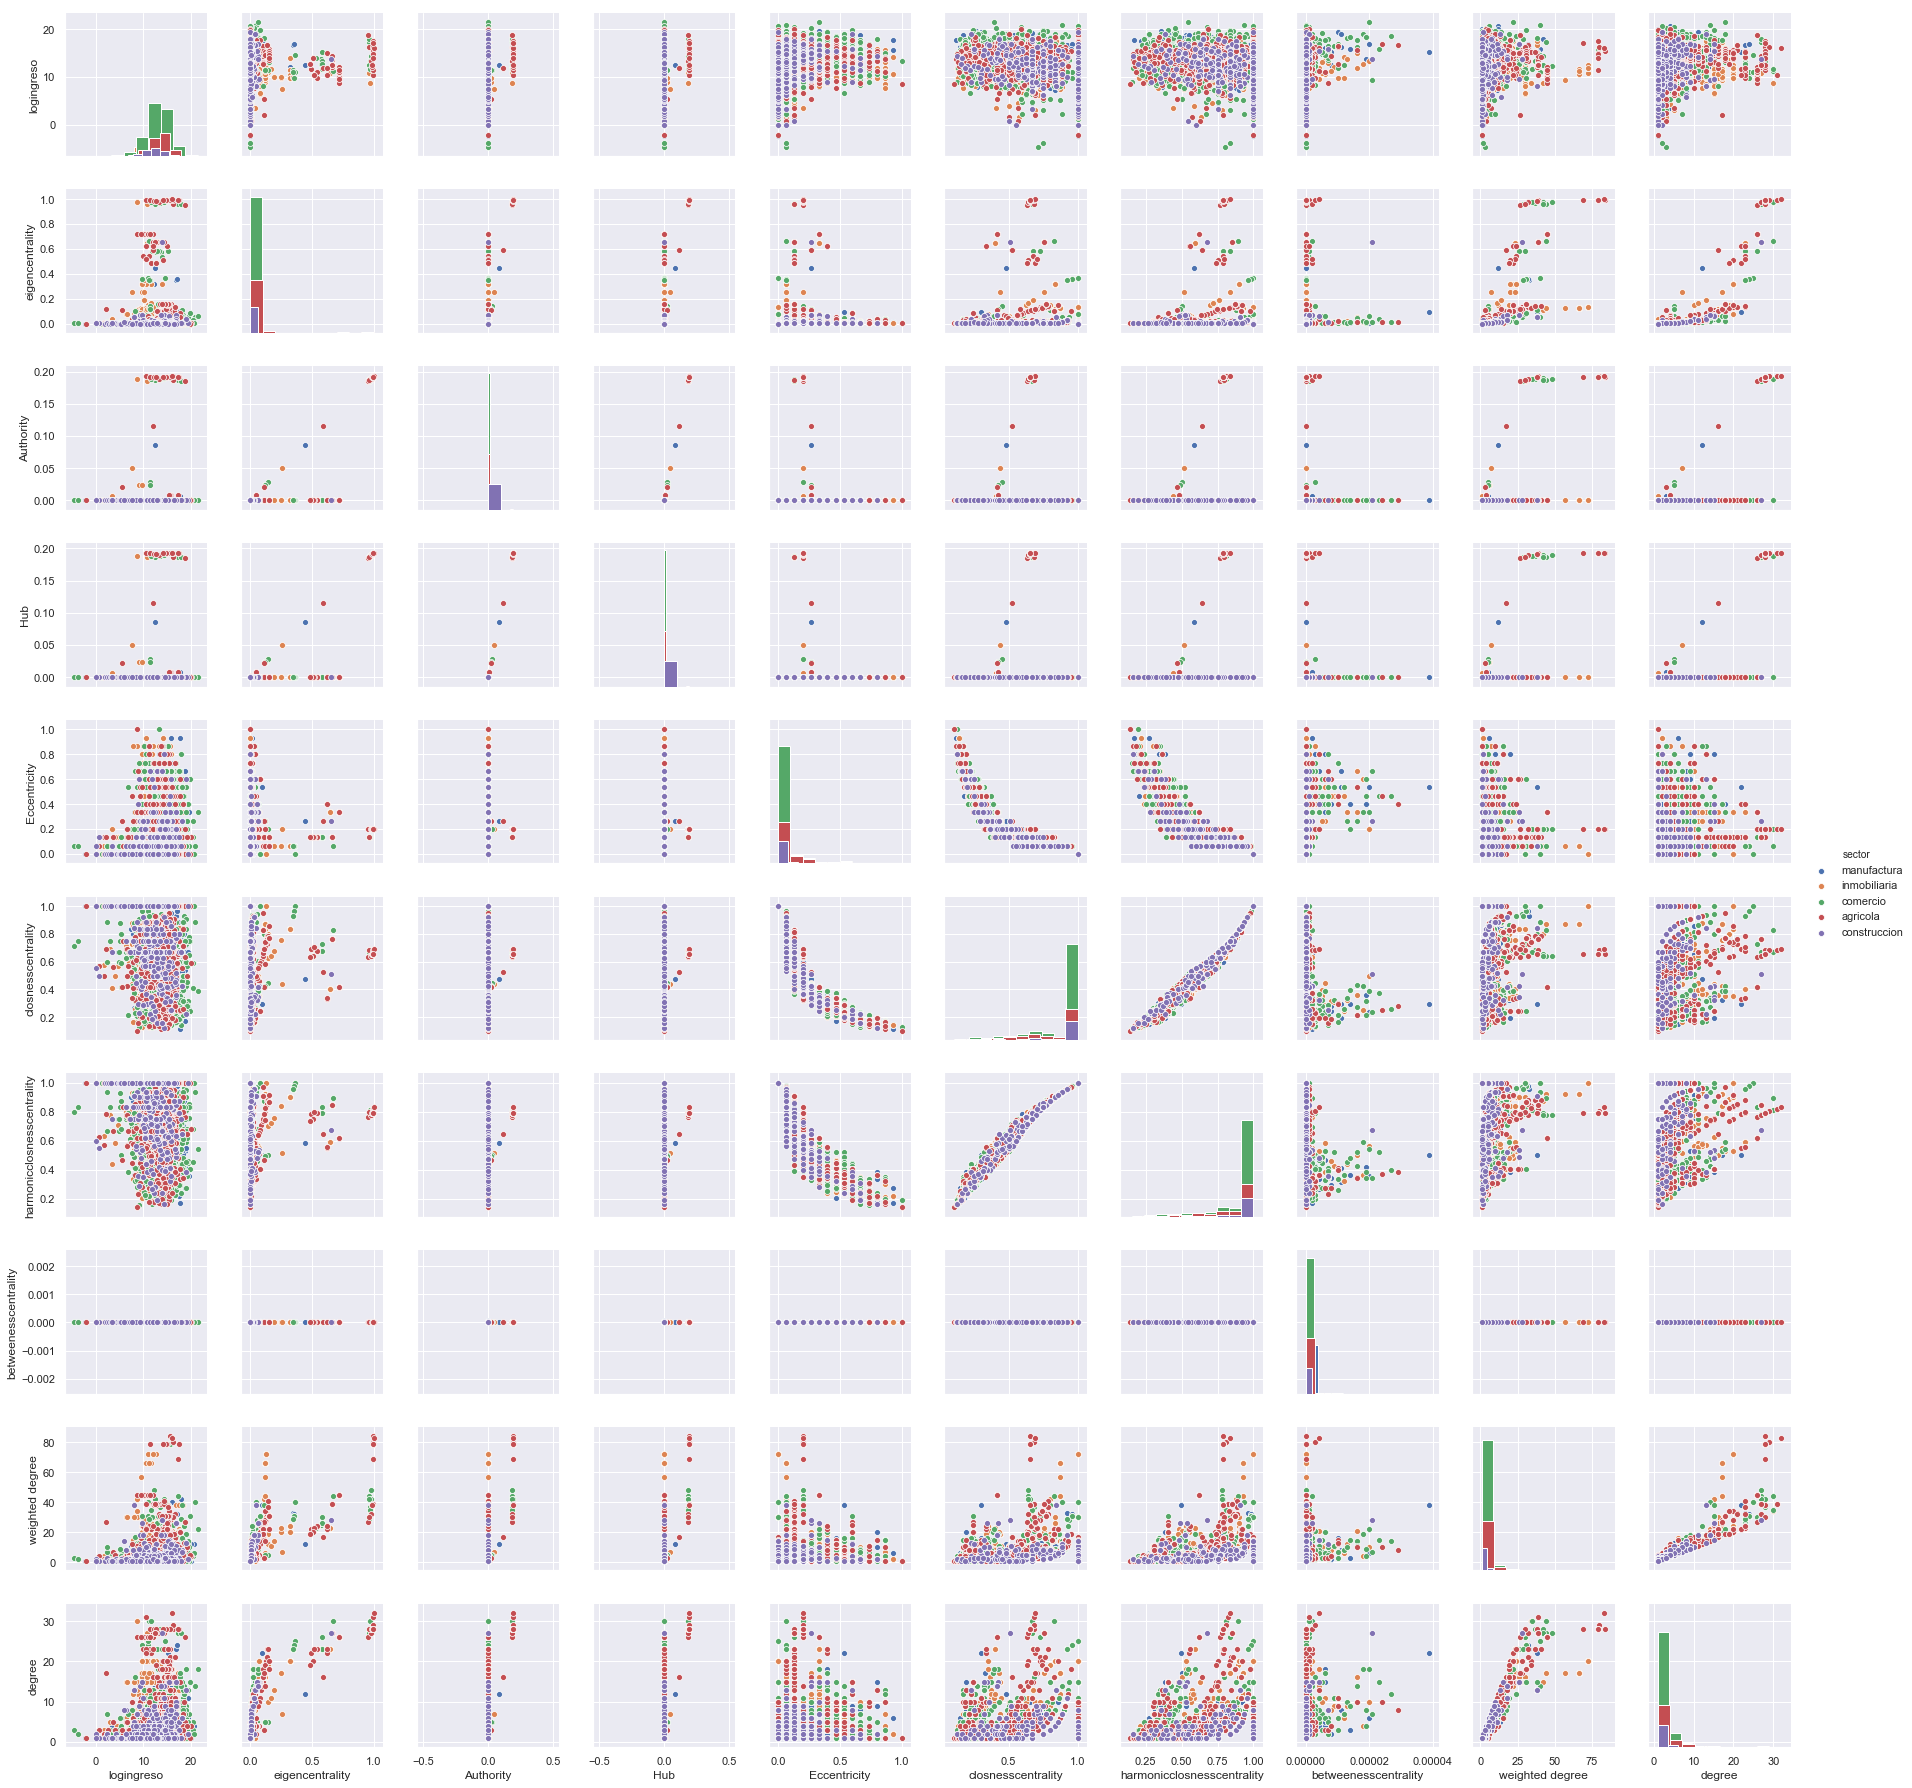

In [729]:
sns.pairplot(dffinal.loc[:,['logingreso','sector','eigencentrality','Authority',
                           'Hub','Eccentricity','closnesscentrality','harmonicclosnesscentrality','betweenesscentrality',
                        'weighted degree','degree' ]], diag_kind="hist",hue="sector") 
#plt.savefig('pairplottam.png', bbox_inches='tight')
plt.show()                 

In [366]:
#rs= pd.read_csv('resultados.csv')
#rs['logingreso']= dffinal['logingreso']
#round(rs.iloc[:,0:].corr(method ='spearman'),3)#.iloc[:,31:]

In [560]:
dffinal['tamano'].value_counts()


PEQUEÑA         3282
MICROEMPRESA    2512
MEDIANA         2003
GRANDE          1273
Name: tamano, dtype: int64

In [561]:
dffinal['sector'].value_counts()

comercio        3822
inmoviliaria    1579
agricola        1576
manufactura     1375
construccion     718
Name: sector, dtype: int64

In [730]:
import researchpy as rp
#Si el valor p obtenido es inferior a lo que se está probando, entonces se puede afirmar que existe una 
# relación significativa entre las variables. La mayoría de los campos usan un nivel alfa de 0.05 que también usaré.

In [731]:
corr_type, corr_matrix, corr_ps = rp.corr_case(dffinal.loc[:,['mismoSec','otroSec','mismoSecXotroSec','logingreso','manufdummy','agridummy','comdummy','constdummy', 'inmovdummy','totalConexiones','pequena','microempresa','mediana','grande','eigencentrality','Authority',
                           'Hub','Eccentricity','closnesscentrality','harmonicclosnesscentrality','betweenesscentrality','weighted degree','degree','clustering', 'triangles'     ]],method='spearman')

corr_type2, corr_matrix2, corr_ps2 = rp.corr_case(dffinal.loc[:,['mismoSec','otroSec','logingreso','roe','roa','empleado','rat','autonomia_financiera',
                        'totalConexiones','utilidad','patrimonio','pasivo','activo','eigencentrality','Authority',
                           'Hub','Eccentricity','closnesscentrality','harmonicclosnesscentrality','betweenesscentrality',
                        'weighted degree','degree','clustering', 'triangles'     ]],method='spearman')



In [732]:
# corr_ps2 #.iloc[:,9:]
#rp.corr_pair(dffinal.loc[:,['mismoSec','otroSec','mismoSecXotroSec','logingreso','manufdummy','agridummy','comdummy','constdummy', 'inmovdummy','totalConexiones','pequena','microempresa','mediana','grande','eigencentrality','Authority',
 #                          'Hub','Eccentricity','closnesscentrality','harmonicclosnesscentrality','betweenesscentrality','weighted degree','degree','clustering', 'triangles'     ]])

In [792]:
dfcorr= dffinal.copy()
dfcorr['logpatrimonio']= np.log(dffinal['patrimonio'])
dfcorr['logactivo']= np.log(dffinal['activo'])
dfcorr['logpasivo']= np.log(dffinal['pasivo'])
dfcorr['logutilidad']= np.log(dffinal['utilidad'])
dfcorr['logeigen']= np.log(dffinal['eigencentrality'])
dfcorr['logbet']= np.log(dffinal['betweenesscentrality'])
dfcorr['logecc']= np.log(dffinal['Eccentricity'])



C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\User\Anaconda3\lib\si

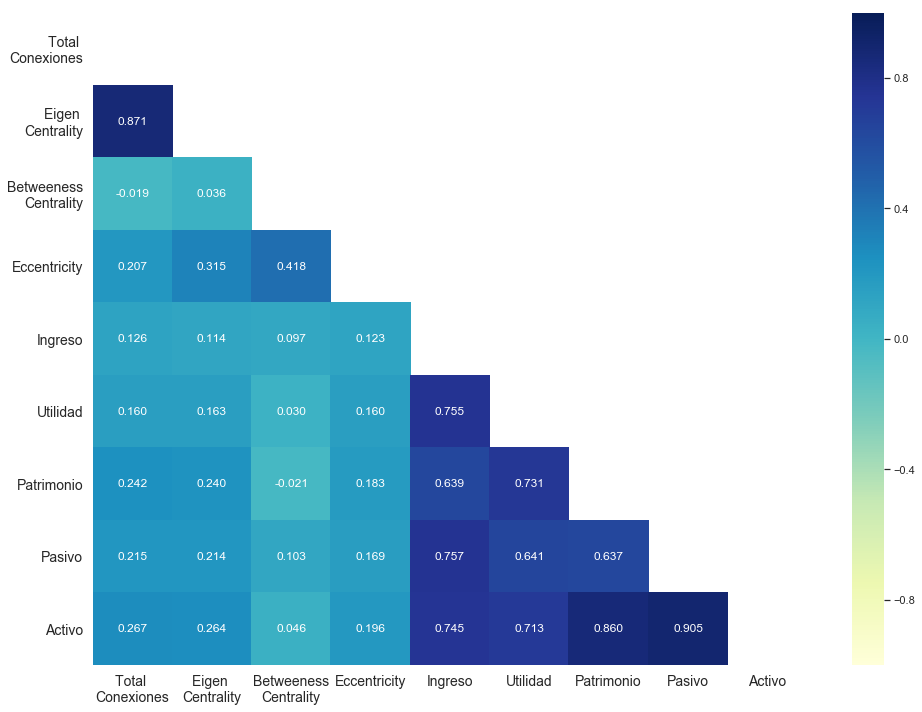

In [795]:
plt.figure(figsize = (16,12))

corrfinal= dfcorr.loc[:,['totalConexiones','logeigen','logbet', 'logecc',
                        'logingreso','logutilidad','logpatrimonio','logpasivo','logactivo']].corr(method ='spearman') 
mascaracorr = np.zeros_like(corrfinal)
mascaracorr[np.triu_indices_from(corrfinal)] = True

ax=sns.heatmap(corrfinal,
      xticklabels =np.array(['Total \nConexiones', 'Eigen \nCentrality', 'Betweeness\nCentrality', 'Eccentricity','Ingreso', 'Utilidad', 
                             'Patrimonio','Pasivo' ,'Activo'  ]), 
      yticklabels =np.array(['Total \nConexiones', 'Eigen \nCentrality', 'Betweeness\nCentrality', 'Eccentricity','Ingreso', 'Utilidad', 
                             'Patrimonio','Pasivo' ,'Activo'  ]),
        cmap='YlGnBu', annot=True,mask=mascaracorr ,fmt='.3f', annot_kws={"size": 12},vmin = - 1 , vmax = 1 , center = 0 ) 


plt.yticks(rotation=360,size=14)
plt.xticks(rotation=0,size=14)

ax.set_facecolor('white')
plt.savefig('heatmapCorrelation.jpeg', bbox_inches='tight', dpi=100)

plt.show()

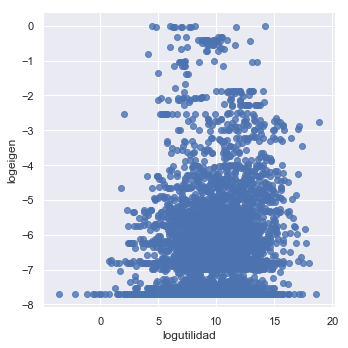

In [810]:
sns.lmplot(x='logutilidad',y='logeigen',data=dfcorr,order = 1)
plt.show()

In [762]:
#corr_type3, corr_matrix3, corr_ps3 = rp.corr_case(dfcorr.loc[:,['totalConexiones','eigencentrality','betweenesscentrality', 'Eccentricity',
#                        'logingreso','logutilidad','logpatrimonio','logpasivo','logactivo']].corr(method ='spearman') )
# dffinal.to_excel('datafinalBetEigOtros.xlsx')

In [763]:
corr_ps3 #.iloc[:,9:]

totalConexiones eigencentrality betweenesscentrality  \
totalConexiones               0.0000          0.0001               0.9635   
eigencentrality               0.0001          0.0000               0.9445   
betweenesscentrality          0.9635          0.9445               0.0000   
Eccentricity                  0.2052          0.0356               0.5914   
logingreso                    0.0412          0.0133               0.0941   
logutilidad                   0.0518          0.0201               0.0888   
logpatrimonio                 0.1222          0.0608               0.0719   
logpasivo                     0.0939          0.0428               0.0844   
logactivo                     0.1082          0.0495               0.0609   

                     Eccentricity logingreso logutilidad logpatrimonio  \
totalConexiones            0.2052     0.0412      0.0518        0.1222   
eigencentrality            0.0356     0.0133      0.0201        0.0608   
betweenesscentrality       0.5914     0.0941      0.0888        0.0719   
Eccentricity               0.0000     0.0167      0.0226        0.0442   
logingreso                 0.0167     0.0000      0.0003        0.0046   
logutilidad                0.0226     0.0003      0.0000        0.0011   
logpatrimonio              0.0442     0.0046      0.0011        0.0000   
logpasivo                  0.0350     0.0005      0.0050        0.0050   
logactivo                  0.0333     0.0008      0.0018        0.0001   

                     logpasivo logactivo  
totalConexiones         0.0939    0.1082  
eigencentrality         0.0428    0.0495  
betweenesscentrality    0.0844    0.0609  
Eccentricity            0.0350    0.0333  
logingreso              0.0005    0.0008  
logutilidad             0.0050    0.0018  
logpatrimonio           0.0050    0.0001  
logpasivo               0.0000    0.0000  
logactivo               0.0000    0.0000

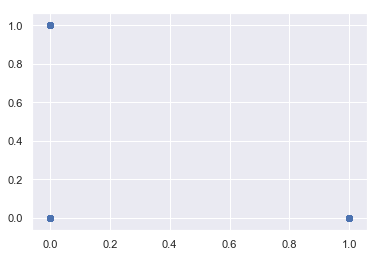

In [862]:
plt.scatter(dfcorr['comdummy'],dfcorr['agridummy'])

In [867]:
import scipy.stats as ss
import seaborn as sns

def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [868]:
confusion_matrix = pd.crosstab(dffinal["sector"], dffinal["tamano"]).as_matrix()
cramers_v(confusion_matrix)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.19167404803356086

In [937]:
list_of_sector= list(np.unique(dffinal['sector'].values))
list_of_tamano= list(np.unique(dffinal['tamano'].values))

confusions = []
for sector1 in list_of_sector:
    for tamano1 in list_of_tamano:
        cond = (dffinal['sector'] == sector1) & (dffinal['tamano'] == tamano1)
        confusions.append(cond.sum())
confusion_matrix = np.array(confusions).reshape(len(list_of_sector), len(list_of_tamano))

In [938]:
import numpy as np
import scipy.stats as ss

def cramers_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

result = cramers_stat(confusion_matrix)

In [939]:
result

0.19278965353933247

In [942]:
factors_paired = [(i,j) for i in df.columns.values for j in df.columns.values] 

chi2, p_values =[], []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(df[f[0]], df[f[1]]))   
    chi2.append(chitest[0])
    p_values.append(chitest[1])
else:      # for same factor pair
    chi2.append(0)
    p_values.append(0)

chi2 = np.array(chi2).reshape((23,23)) # shape it as a matrix
chi2 = pd.DataFrame(chi2, index=df.columns.values, columns=df.columns.values)

In [954]:
df= dffinal[['tamano','sector']]
factors_paired = [(i,j) for i in df.columns.values for j in df.columns.values]

In [959]:
factors_paired

[('tamano', 'tamano'),
 ('tamano', 'sector'),
 ('sector', 'tamano'),
 ('sector', 'sector')]

In [968]:
pd.crosstab(dffinal["sector"], dffinal["tamano"])

tamano        GRANDE  MEDIANA  MICROEMPRESA  PEQUEÑA
sector                                              
agricola         242      488           287      559
comercio         617      927           868     1410
construccion      62      119           258      279
inmobiliaria      37      122           842      578
manufactura      315      347           257      456

In [976]:
corr_type, corr_matrix, corr_ps = rp.corr_case(dffinal.loc[:,['manufdummy','agridummy','comdummy','constdummy', 'inmovdummy','pequena','microempresa','mediana','grande','eigencentrality','totalConexiones' ]],method='spearman')


In [978]:
corr_matrix

manufdummy agridummy comdummy constdummy inmovdummy pequena  \
manufdummy               1   -0.1939  -0.3607    -0.1239    -0.1941 -0.0266   
agridummy          -0.1939         1  -0.3914    -0.1345    -0.2105 -0.0068   
comdummy           -0.3607   -0.3914        1    -0.2502    -0.3918  0.0125   
constdummy         -0.1239   -0.1345  -0.2502          1    -0.1346  0.0163   
inmovdummy         -0.1941   -0.2105  -0.3918    -0.1346          1   0.004   
pequena            -0.0266   -0.0068   0.0125     0.0163      0.004       1   
microempresa       -0.0851   -0.0972  -0.0951      0.054     0.2629  -0.466   
mediana             0.0321    0.0982   0.0447    -0.0389    -0.1589 -0.4009   
grande               0.108    0.0174   0.0518    -0.0456    -0.1545 -0.3043   
eigencentrality    -0.0204    0.1525  -0.1262    -0.0918     0.0965 -0.0751   
totalConexiones     -0.014    0.1469   -0.112    -0.0928     0.0783 -0.0838   

                microempresa mediana  grande eigencentrality totalConexiones  
manufdummy           -0.0851  0.0321   0.108         -0.0204          -0.014  
agridummy            -0.0972  0.0982  0.0174          0.1525          0.1469  
comdummy             -0.0951  0.0447  0.0518         -0.1262          -0.112  
constdummy             0.054 -0.0389 -0.0456         -0.0918         -0.0928  
inmovdummy            0.2629 -0.1589 -0.1545          0.0965          0.0783  
pequena               -0.466 -0.4009 -0.3043         -0.0751         -0.0838  
microempresa               1 -0.3295 -0.2501         -0.0449         -0.0479  
mediana              -0.3295       1 -0.2151          0.0075          0.0217  
grande               -0.2501 -0.2151       1          0.1527          0.1517  
eigencentrality      -0.0449  0.0075  0.1527               1          0.8711  
totalConexiones      -0.0479  0.0217  0.1517          0.8711               1

In [979]:
corr_ps

manufdummy agridummy comdummy constdummy inmovdummy pequena  \
manufdummy          0.0000    0.0000   0.0000     0.0000     0.0000  0.0114   
agridummy           0.0000    0.0000   0.0000     0.0000     0.0000  0.5154   
comdummy            0.0000    0.0000   0.0000     0.0000     0.0000  0.2322   
constdummy          0.0000    0.0000   0.0000     0.0000     0.0000  0.1204   
inmovdummy          0.0000    0.0000   0.0000     0.0000     0.0000  0.7022   
pequena             0.0114    0.5154   0.2322     0.1204     0.7022  0.0000   
microempresa        0.0000    0.0000   0.0000     0.0000     0.0000  0.0000   
mediana             0.0022    0.0000   0.0000     0.0002     0.0000  0.0000   
grande              0.0000    0.0970   0.0000     0.0000     0.0000  0.0000   
eigencentrality     0.0525    0.0000   0.0000     0.0000     0.0000  0.0000   
totalConexiones     0.1840    0.0000   0.0000     0.0000     0.0000  0.0000   

                microempresa mediana  grande eigencentrality totalConexiones  
manufdummy            0.0000  0.0022  0.0000          0.0525          0.1840  
agridummy             0.0000  0.0000  0.0970          0.0000          0.0000  
comdummy              0.0000  0.0000  0.0000          0.0000          0.0000  
constdummy            0.0000  0.0002  0.0000          0.0000          0.0000  
inmovdummy            0.0000  0.0000  0.0000          0.0000          0.0000  
pequena               0.0000  0.0000  0.0000          0.0000          0.0000  
microempresa          0.0000  0.0000  0.0000          0.0000          0.0000  
mediana               0.0000  0.0000  0.0000          0.4767          0.0389  
grande                0.0000  0.0000  0.0000          0.0000          0.0000  
eigencentrality       0.0000  0.4767  0.0000          0.0000          0.0000  
totalConexiones       0.0000  0.0389  0.0000          0.0000          0.0000

In [ ]:
dffinal['betweenesscentrality']

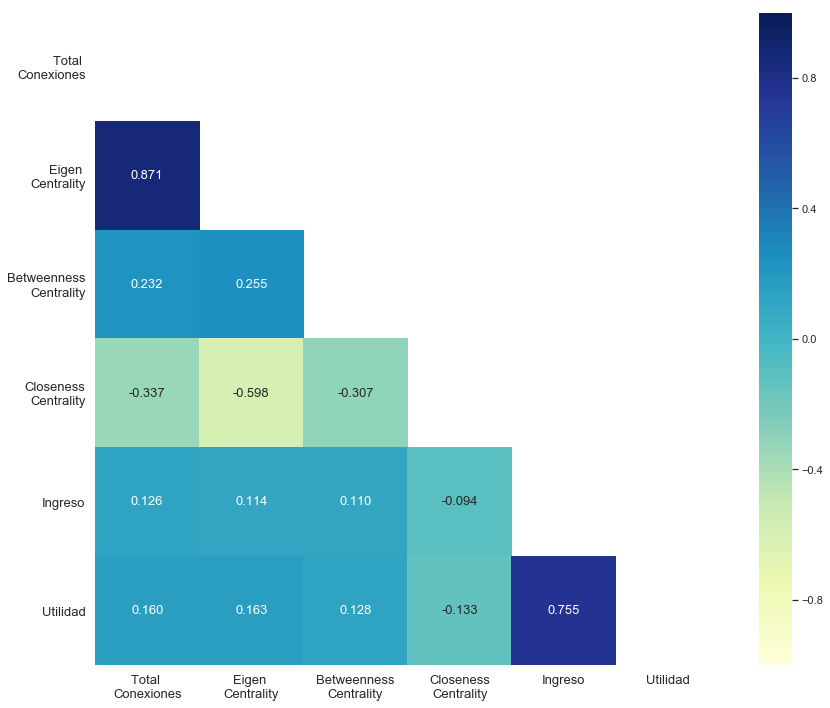

In [999]:
plt.figure(figsize = (14,12))

corrfinaldism = dfcorr.loc[:,['totalConexiones','eigencentrality','betweenesscentrality', 'closnesscentrality',
                        'logingreso','logutilidad' ]].corr(method ='spearman') 
mascaracorrdism = np.zeros_like(corrfinaldism)
mascaracorrdism[np.triu_indices_from(corrfinaldism)] = True

ax=sns.heatmap(corrfinaldism,
      xticklabels =np.array(['Total \nConexiones', 'Eigen \nCentrality', 'Betweenness\nCentrality', 'Closeness\nCentrality','Ingreso', 'Utilidad' ]), 
      yticklabels =np.array(['Total \nConexiones', 'Eigen \nCentrality', 'Betweenness\nCentrality', 'Closeness\nCentrality','Ingreso', 'Utilidad' ]),
        cmap='YlGnBu', annot=True,mask=mascaracorrdism ,fmt='.3f', annot_kws={"size": 13},vmin = - 1 , vmax = 1 , center = 0 ) 


plt.yticks(rotation=360,size=13)
plt.xticks(rotation=0,size=13)

ax.set_facecolor('white')
plt.savefig('heatmapCorrelationdism.jpeg', bbox_inches='tight', dpi=100)

plt.show()

In [1002]:
dffinal.columns

Index(['idEmp', 'mismoSec', 'otroSec', 'ingreso', 'empleado', 'mismoSecCuad',
       'otroSecCuad', 'logingreso', 'logempleado', 'ing/emp', 'loging/emp',
       'ingresoenmillones', 'ingenmill/emp', 'ingresoenmiles',
       'ingenmiles/emp', 'log.ing/emp', 'log.ingenmiles/emp', 'loging/logemp',
       'mismoSecXotroSec', 'totalConexiones', 'logtotalConexiones', 'sector',
       'manufdummy', 'agridummy', 'comdummy', 'constdummy', 'inmovdummy',
       'tamano', 'pequena', 'microempresa', 'mediana', 'grande', 'nombre',
       'eigencentrality', 'eigenminmax', 'eigenzscore', 'utilidad',
       'patrimonio', 'activo', 'roe', 'roa', 'Authority', 'Hub',
       'Eccentricity', 'closnesscentrality', 'harmonicclosnesscentrality',
       'betweenesscentrality', 'weighted degree', 'degree', 'clustering',
       'triangles', 'rat', 'autonomia_financiera', 'pasivo'],
      dtype='object')

In [1016]:
dffinal.loc[:,['sector','tamano','eigencentrality','betweenesscentrality', 'idEmp','nombre',
               'closnesscentrality' ]].sort_values('eigencentrality',ascending= False).head(10)



sector        tamano  eigencentrality  betweenesscentrality   idEmp  \
8846  agricola        GRANDE         1.000000              0.000004    9417   
6024  agricola  MICROEMPRESA         0.993953              0.000001  182353   
7280  agricola        GRANDE         0.993465              0.000003    4863   
7095  agricola       MEDIANA         0.991666              0.000000   43850   
8921  agricola        GRANDE         0.991666              0.000000    9631   
7317  comercio        GRANDE         0.991666              0.000000    4944   
7290  agricola        GRANDE         0.991666              0.000000    4886   
7281  agricola        GRANDE         0.991666              0.000000    4864   
8475  agricola       MEDIANA         0.991666              0.000000   82137   
7367  agricola       MEDIANA         0.991666              0.000000    5126   

                                                 nombre  closnesscentrality  
8846                           BANANERA LAS MERCEDES SA            0.692308  
6024  CIUDAD SATELITE PLAYAS NEWLIFE CIUSAPLANEWSA S.A.            0.681818  
7280      COMPANIA AGRICOLA LOMA LARGA SOCIEDAD ANONIMA            0.681818  
7095                                        AGRIMONT SA            0.652174  
8921                      INDUSTRIAL BANANERA ALAMOS SA            0.652174  
7317       COMPANIA AGRICOLA RIO VENTANAS S.A. CARIVESA            0.652174  
7290                   COMPANIA AGRICOLA LA JULIA S. A.            0.652174  
7281           COMPANIA AGRICOLA ANGELA MARIA SA CAAMSA            0.652174  
8475                                        FRUSHI S.A.            0.652174  
7367  COMPANIA AGRICOLA BANANERA DEL ECUADOR SOCIEDA...            0.652174

In [1017]:
dffinal.loc[:,['sector','tamano','eigencentrality','betweenesscentrality', 'idEmp','nombre',
               'closnesscentrality' ]].sort_values('betweenesscentrality',ascending= False).head(10)



sector        tamano  eigencentrality  betweenesscentrality  \
8561   manufactura       MEDIANA         0.092489              0.000039   
6836      agricola        GRANDE         0.013220              0.000029   
6469      comercio        GRANDE         0.012559              0.000027   
331       agricola        GRANDE         0.013706              0.000024   
745       comercio        GRANDE         0.037370              0.000023   
1594      comercio  MICROEMPRESA         0.009651              0.000021   
4662  construccion       MEDIANA         0.655456              0.000021   
5833  inmobiliaria       PEQUEÑA         0.060183              0.000020   
8669   manufactura        GRANDE         0.007644              0.000020   
6849      comercio        GRANDE         0.062667              0.000020   

       idEmp                             nombre  closnesscentrality  
8561    8518       INASA INDUSTRIAL ACEITERA SA            0.298755  
6836   38244         LANGOSTINO S.A. (LANCONOR)            0.280156  
6469   30152   ALMACENES JUAN ELJURI CIA. LTDA.            0.260163  
331   127203                  GOLDENSHRIMP S.A.            0.251748  
745   147453  RESINAS DEL ECUADOR S.A. RESINESA            0.375000  
1594   29791   BOUTIQUE TERRUA S.A. BOUTERRUASA            0.234432  
4662  137736        PLAZA TIA UNO S.A. SOLIDASA            0.513514  
5833  174556                   CRISTATERRA S.A.            0.500000  
8669    8847  INDUSTRIAS MOTORIZADAS INDUMOT SA            0.240602  
6849     384          CORPORACION FAVORITA C.A.            0.392157

In [1018]:
dffinal.loc[:,['sector','tamano','eigencentrality','betweenesscentrality', 'idEmp','nombre',
               'closnesscentrality' ]].sort_values('closnesscentrality',ascending= False).head(10)



sector        tamano  eigencentrality  betweenesscentrality  \
0      manufactura        GRANDE         0.000454                   0.0   
5257   manufactura  MICROEMPRESA         0.000454                   0.0   
5271      comercio        GRANDE         0.001967                   0.0   
5270  inmobiliaria       PEQUEÑA         0.000454                   0.0   
5268  inmobiliaria  MICROEMPRESA         0.004412                   0.0   
5267  construccion  MICROEMPRESA         0.000454                   0.0   
5266      agricola        GRANDE         0.000454                   0.0   
5265      agricola  MICROEMPRESA         0.004140                   0.0   
5264   manufactura       PEQUEÑA         0.001967                   0.0   
5263  inmobiliaria       PEQUEÑA         0.000454                   0.0   

       idEmp                                       nombre  closnesscentrality  
0     100030   CARROCERIAS BUSCAR'S KARINA BUSKARINA S.A.                 1.0  
5257  155603                             OCRES CIA. LTDA.                 1.0  
5271  156409                    IGLESIAS TAPIA CIA. LTDA.                 1.0  
5270  156408   PROMOCIONES INMOBILIARIAS PROMORYMAPI S.A.                 1.0  
5268  156392             BUREAU INTERNACIONAL BUNTER S.A.                 1.0  
5267  156322  CONSTRUCALLES VIAS Y MAQUINARIAS CIA. LTDA.                 1.0  
5266  156135           PLANTAS TECNICAS PLANTEC CIA.LTDA.                 1.0  
5265  156118                               URUGEQUIN S.A.                 1.0  
5264  156080        CEREALES ANDINOS CERANDINA CIA. LTDA.                 1.0  
5263  156073                          ATILEUBA CIA. LTDA.                 1.0

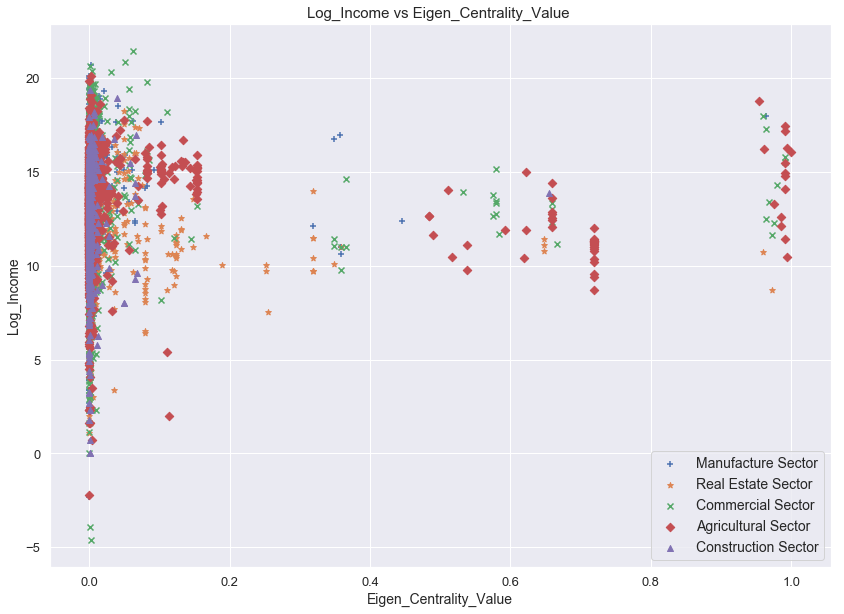

In [1045]:
plt.figure(figsize=(14,10))

plt.scatter(x= dffinal.loc[dffinal['sector']== 'manufactura','eigencentrality'], y= dffinal.loc[dffinal['sector']== 'manufactura','logingreso'], label='Manufacture Sector',marker='+')                                       
plt.scatter(x = dffinal.loc[dffinal['sector']== 'inmobiliaria','eigencentrality'],y=  dffinal.loc[dffinal['sector']== 'inmobiliaria','logingreso'], label='Real Estate Sector',marker='*')
plt.scatter(x= dffinal.loc[dffinal['sector']== 'comercio','eigencentrality'], y= dffinal.loc[dffinal['sector']== 'comercio','logingreso'], label='Commercial Sector',marker='x')
plt.scatter(x= dffinal.loc[dffinal['sector']== 'agricola','eigencentrality'], y= dffinal.loc[dffinal['sector']== 'agricola','logingreso'], label='Agricultural Sector',marker='D')
plt.scatter(x= dffinal.loc[dffinal['sector']== 'construccion','eigencentrality'],y=  dffinal.loc[dffinal['sector']== 'construccion','logingreso'], label='Construction Sector',marker='^')

plt.title('Log_Income vs Eigen_Centrality_Value ',size=15)
plt.ylabel('Log_Income',size=14)
plt.xlabel('Eigen_Centrality_Value',size=14)
plt.yticks(size=13)
plt.xticks(size=13)

plt.legend(loc='best',prop={'size': 14})
plt.savefig('logincome-eigen.jpeg', bbox_inches='tight', dpi=100)


plt.show()

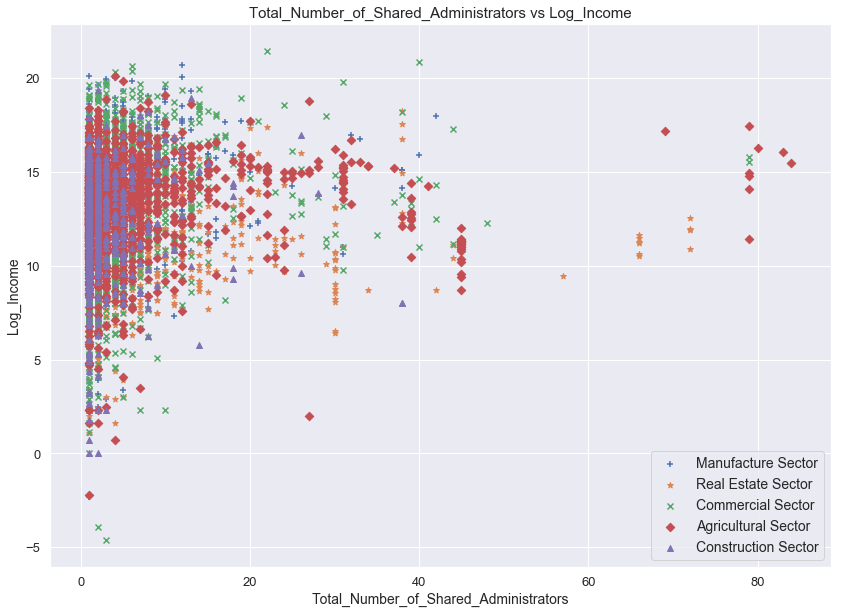

In [1046]:
plt.figure(figsize=(14,10))

plt.scatter(dffinal.loc[dffinal['sector']== 'manufactura','totalConexiones'], dffinal.loc[dffinal['sector']== 'manufactura','logingreso'], label='Manufacture Sector',marker='+')
plt.scatter(dffinal.loc[dffinal['sector']== 'inmobiliaria','totalConexiones'], dffinal.loc[dffinal['sector']== 'inmobiliaria','logingreso'], label='Real Estate Sector',marker='*')                          
plt.scatter(dffinal.loc[dffinal['sector']== 'comercio','totalConexiones'], dffinal.loc[dffinal['sector']== 'comercio','logingreso'], label='Commercial Sector',marker='x')
plt.scatter(dffinal.loc[dffinal['sector']== 'agricola','totalConexiones'], dffinal.loc[dffinal['sector']== 'agricola','logingreso'], label='Agricultural Sector',marker='D')
plt.scatter(dffinal.loc[dffinal['sector']== 'construccion','totalConexiones'], dffinal.loc[dffinal['sector']== 'construccion','logingreso'], label='Construction Sector',marker='^')

plt.title('Total_Number_of_Shared_Administrators vs Log_Income',size=15)
plt.xlabel('Total_Number_of_Shared_Administrators',size=14)
plt.ylabel('Log_Income',size=14)
plt.yticks(size=13)
plt.xticks(size=13)

plt.legend(loc='best',prop={'size': 14})
plt.savefig('logincome-shared-admin.jpeg', bbox_inches='tight', dpi=100) 

plt.show()